In [1]:
import argparse
import numpy as np
import torch
from utils import get_dataset, get_net, get_strategy
from pprint import pprint
import pickle

Files already downloaded and verified


In [2]:
# 'EMNIST_log'
# 'CIFAR10_log'
# "EMNIST_cnn"
# "CIFAR10_cnn"
# "Imagenet_res_cnn"
# "Imagenet_res_res18"

In [3]:
# choices=["RandomSampling", 
#                              "LeastConfidence", 
#                              "MarginSampling", 
#                              "EntropySampling", 
#                              "LeastConfidenceDropout", 
#                              "MarginSamplingDropout", 
#                              "EntropySamplingDropout", 
#                              "KMeansSampling",
#                              "KCenterGreedy", 
#                              "BALDDropout", 
#                              "AdversarialBIM", 
#                              "AdversarialDeepFool"]

In [4]:
samples = np.load("../new_marich/results/samp_cnn_emnist.npy")

In [5]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_cnn"
strat = "KCenterGreedy"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(5):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

    with open("./results/acc"+name+strat, "wb") as fp:
      pickle.dump(acc_list_kc_list, fp)
    with open("./results/agr"+name+strat, "wb") as fp:
      pickle.dump(agr_list_kc_list, fp)
    with open("./results/kl"+name+strat, "wb") as fp:
      pickle.dump(kl_list_kc_list, fp)

number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1600, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:12<01:55, 12.84s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:18<01:07,  8.40s/it]

saving model
Train accuracy =  tensor(0.2300, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:25<00:56,  8.02s/it]

saving model
Train accuracy =  tensor(0.2275, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:33<00:46,  7.80s/it]

saving model
Train accuracy =  tensor(0.2275, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:41<00:39,  7.98s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:47<00:29,  7.48s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:54<00:21,  7.02s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:00<00:13,  6.89s/it]

saving model
Train accuracy =  tensor(0.2275, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:05<00:06,  6.33s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:10<00:00,  7.09s/it]


saving model


100%|██████████| 40/40 [00:14<00:00,  2.85it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1


100%|█████████████████████████████████████████████████████████████| 555/555 [02:02<00:00,  4.53it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2109, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.96s/it]

saving model
Train accuracy =  tensor(0.2121, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.19s/it]

saving model
Train accuracy =  tensor(0.2121, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.21s/it]

saving model
Train accuracy =  tensor(0.2085, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.14s/it]

saving model
Train accuracy =  tensor(0.2133, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.08s/it]

saving model
Train accuracy =  tensor(0.2168, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.13s/it]

saving model
Train accuracy =  tensor(0.2239, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.29s/it]

saving model
Train accuracy =  tensor(0.2239, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.18s/it]

saving model
Train accuracy =  tensor(0.2464, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.29s/it]

saving model
Train accuracy =  tensor(0.2618, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.19s/it]


saving model


100%|██████████| 40/40 [00:06<00:00,  5.86it/s]




Round 1 testing accuracy: 10.71 %
Samples: 1055
Round 2


100%|█████████████████████████████████████████████████████████████| 561/561 [02:21<00:00,  3.95it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2647, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:16,  8.50s/it]

saving model
Train accuracy =  tensor(0.3150, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:01,  7.68s/it]

saving model
Train accuracy =  tensor(0.3181, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:50,  7.27s/it]

saving model
Train accuracy =  tensor(0.3498, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:29<00:42,  7.03s/it]

saving model
Train accuracy =  tensor(0.3769, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:34,  6.84s/it]

saving model
Train accuracy =  tensor(0.3731, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:27,  6.78s/it]

saving model
Train accuracy =  tensor(0.4009, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:20,  6.75s/it]

saving model
Train accuracy =  tensor(0.4056, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:56<00:13,  6.88s/it]

saving model
Train accuracy =  tensor(0.4133, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:02<00:06,  6.73s/it]

saving model
Train accuracy =  tensor(0.3978, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:08<00:00,  6.90s/it]


saving model


100%|██████████| 40/40 [00:09<00:00,  4.34it/s]




Round 2 testing accuracy: 28.51 %
Samples: 1616
Round 3


100%|█████████████████████████████████████████████████████████████| 567/567 [03:21<00:00,  2.81it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4255, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.25s/it]

saving model
Train accuracy =  tensor(0.4347, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.38s/it]

saving model
Train accuracy =  tensor(0.4307, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.37s/it]

saving model
Train accuracy =  tensor(0.4336, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.18s/it]

saving model
Train accuracy =  tensor(0.4502, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:25,  5.20s/it]

saving model
Train accuracy =  tensor(0.4611, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.33s/it]

saving model
Train accuracy =  tensor(0.4496, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.40s/it]

saving model
Train accuracy =  tensor(0.4696, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:11,  5.56s/it]

saving model
Train accuracy =  tensor(0.4639, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.76s/it]

saving model
Train accuracy =  tensor(0.4719, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.59s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.59it/s]




Round 3 testing accuracy: 34.14 %
Samples: 2183
Round 4


100%|█████████████████████████████████████████████████████████████| 573/573 [04:05<00:00,  2.33it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4646, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.46s/it]

saving model
Train accuracy =  tensor(0.4823, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.09s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.88s/it]

saving model
Train accuracy =  tensor(0.5086, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.01s/it]

saving model
Train accuracy =  tensor(0.5068, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.18s/it]

saving model
Train accuracy =  tensor(0.5032, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.18s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.19s/it]

saving model
Train accuracy =  tensor(0.5290, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.18s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.24s/it]

saving model
Train accuracy =  tensor(0.5431, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.19s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  6.97it/s]




Round 4 testing accuracy: 60.480000000000004 %
Samples: 2756
Round 5


100%|█████████████████████████████████████████████████████████████| 581/581 [05:12<00:00,  1.86it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5320, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:20<03:06, 20.76s/it]

saving model
Train accuracy =  tensor(0.5264, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:26<01:34, 11.77s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:33<01:06,  9.49s/it]

saving model
Train accuracy =  tensor(0.5635, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:39<00:50,  8.45s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:46<00:38,  7.63s/it]

saving model
Train accuracy =  tensor(0.5804, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:51<00:27,  6.97s/it]

saving model
Train accuracy =  tensor(0.5800, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:59<00:21,  7.14s/it]

saving model
Train accuracy =  tensor(0.5826, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:04<00:13,  6.59s/it]

saving model
Train accuracy =  tensor(0.5822, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:10<00:06,  6.38s/it]

saving model
Train accuracy =  tensor(0.5912, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:16<00:00,  7.69s/it]


saving model


100%|██████████| 40/40 [00:06<00:00,  6.03it/s]




Round 5 testing accuracy: 71.25 %
Samples: 3337
Round 6


100%|█████████████████████████████████████████████████████████████| 584/584 [06:25<00:00,  1.52it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5826, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:03,  7.00s/it]

saving model
Train accuracy =  tensor(0.5842, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:58,  7.27s/it]

saving model
Train accuracy =  tensor(0.5947, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:51,  7.30s/it]

saving model
Train accuracy =  tensor(0.5979, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:29<00:43,  7.27s/it]

saving model
Train accuracy =  tensor(0.6030, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:35,  7.18s/it]

saving model
Train accuracy =  tensor(0.6142, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:27,  6.85s/it]

saving model
Train accuracy =  tensor(0.6148, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:20,  6.91s/it]

saving model
Train accuracy =  tensor(0.6196, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:56<00:13,  6.91s/it]

saving model
Train accuracy =  tensor(0.6291, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:03<00:06,  6.97s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:10<00:00,  7.05s/it]


saving model


100%|██████████| 40/40 [00:06<00:00,  6.33it/s]




Round 6 testing accuracy: 81.05 %
Samples: 3921
Round 7


 34%|█████████████████████                                        | 203/589 [04:19<23:24,  3.64s/it]

In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_cnn"
strat = "RandomSampling"
# device
acc_list_rs_list = []
agr_list_rs_list = []
kl_list_rs_list = []

for i in range(5):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_rs = []
    agr_list_rs = []
    kl_list_rs = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_rs.append(acc)
    agr_list_rs.append(agr)
    kl_list_rs.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_rs.append(acc)
        agr_list_rs.append(agr)
        kl_list_rs.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_rs_list.append(acc_list_rs)
    agr_list_rs_list.append(agr_list_rs)
    kl_list_rs_list.append(kl_list_rs)

    with open("./results/acc"+name+strat, "wb") as fp:
      pickle.dump(acc_list_rs_list, fp)
    with open("./results/agr"+name+strat, "wb") as fp:
      pickle.dump(agr_list_rs_list, fp)
    with open("./results/kl"+name+strat, "wb") as fp:
      pickle.dump(kl_list_rs_list, fp)

number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1075, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.09s/it]

saving model
Train accuracy =  tensor(0.1800, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:39,  4.98s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.35s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.22it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1833, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.1833, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.1848, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.44s/it]

saving model
Train accuracy =  tensor(0.1906, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.55s/it]

saving model
Train accuracy =  tensor(0.1935, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.58s/it]

saving model
Train accuracy =  tensor(0.1906, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.54s/it]

saving model
Train accuracy =  tensor(0.1848, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.58s/it]

saving model
Train accuracy =  tensor(0.2126, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.2258, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.58s/it]

saving model
Train accuracy =  tensor(0.2199, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.56s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]




Round 1 testing accuracy: 16.89 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2221, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.54s/it]

saving model
Train accuracy =  tensor(0.2810, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.56s/it]

saving model
Train accuracy =  tensor(0.2676, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.49s/it]

saving model
Train accuracy =  tensor(0.2986, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.49s/it]

saving model
Train accuracy =  tensor(0.2986, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.3213, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.57s/it]

saving model
Train accuracy =  tensor(0.3430, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.60s/it]

saving model
Train accuracy =  tensor(0.3326, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.63s/it]

saving model
Train accuracy =  tensor(0.3709, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.54s/it]

saving model
Train accuracy =  tensor(0.3812, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.71it/s]




Round 2 testing accuracy: 30.490000000000002 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3731, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.45s/it]

saving model
Train accuracy =  tensor(0.3850, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.39s/it]

saving model
Train accuracy =  tensor(0.3938, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.4328, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.45s/it]

saving model
Train accuracy =  tensor(0.4328, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.44s/it]

saving model
Train accuracy =  tensor(0.4407, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.49s/it]

saving model
Train accuracy =  tensor(0.4368, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.4519, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.62s/it]

saving model
Train accuracy =  tensor(0.4535, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.64s/it]

saving model
Train accuracy =  tensor(0.4726, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.08it/s]




Round 3 testing accuracy: 47.15 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4729, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.70s/it]

saving model
Train accuracy =  tensor(0.4903, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.57s/it]

saving model
Train accuracy =  tensor(0.4871, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.54s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.50s/it]

saving model
Train accuracy =  tensor(0.4987, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.5090, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.53s/it]

saving model
Train accuracy =  tensor(0.5116, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.51s/it]

saving model
Train accuracy =  tensor(0.5103, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.5103, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.54s/it]

saving model
Train accuracy =  tensor(0.5258, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.03it/s]




Round 4 testing accuracy: 36.47 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5201, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.12s/it]

saving model
Train accuracy =  tensor(0.5342, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.77s/it]

saving model
Train accuracy =  tensor(0.5260, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.77s/it]

saving model
Train accuracy =  tensor(0.5233, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.88s/it]

saving model
Train accuracy =  tensor(0.5342, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.88s/it]

saving model
Train accuracy =  tensor(0.5396, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.92s/it]

saving model
Train accuracy =  tensor(0.5428, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.87s/it]

saving model
Train accuracy =  tensor(0.5559, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.85s/it]

saving model
Train accuracy =  tensor(0.5526, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.87s/it]

saving model
Train accuracy =  tensor(0.5548, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.89s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.85it/s]




Round 5 testing accuracy: 54.790000000000006 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5474, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.72s/it]

saving model
Train accuracy =  tensor(0.5656, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.65s/it]

saving model
Train accuracy =  tensor(0.5740, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.64s/it]

saving model
Train accuracy =  tensor(0.5707, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.5814, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.70s/it]

saving model
Train accuracy =  tensor(0.5800, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.95s/it]

saving model
Train accuracy =  tensor(0.5763, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:15,  5.05s/it]

saving model
Train accuracy =  tensor(0.5810, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.93s/it]

saving model
Train accuracy =  tensor(0.5842, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.83s/it]

saving model
Train accuracy =  tensor(0.5842, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.81s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.03it/s]




Round 6 testing accuracy: 65.24 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5696, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.45s/it]

saving model
Train accuracy =  tensor(0.5642, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.16s/it]

saving model
Train accuracy =  tensor(0.5720, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.13s/it]

saving model
Train accuracy =  tensor(0.5839, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.05s/it]

saving model
Train accuracy =  tensor(0.5945, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.19s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.42s/it]

saving model
Train accuracy =  tensor(0.5949, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.44s/it]

saving model
Train accuracy =  tensor(0.6097, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.43s/it]

saving model
Train accuracy =  tensor(0.6027, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.55s/it]

saving model
Train accuracy =  tensor(0.6199, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.48s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.02it/s]




Round 7 testing accuracy: 74.57000000000001 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5975, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.90s/it]

saving model
Train accuracy =  tensor(0.6004, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.98s/it]

saving model
Train accuracy =  tensor(0.5961, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:37,  5.31s/it]

saving model
Train accuracy =  tensor(0.6208, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.15s/it]

saving model
Train accuracy =  tensor(0.6088, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.10s/it]

saving model
Train accuracy =  tensor(0.6135, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.06s/it]

saving model
Train accuracy =  tensor(0.6099, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.26s/it]

saving model
Train accuracy =  tensor(0.6248, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.38s/it]

saving model
Train accuracy =  tensor(0.6288, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.42s/it]

saving model
Train accuracy =  tensor(0.6288, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.25s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.03it/s]




Round 8 testing accuracy: 80.08999999999999 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6300, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.65s/it]

saving model
Train accuracy =  tensor(0.6431, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.10s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.81s/it]

saving model
Train accuracy =  tensor(0.6398, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:32,  5.45s/it]

saving model
Train accuracy =  tensor(0.6503, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:26,  5.25s/it]

saving model
Train accuracy =  tensor(0.6451, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.35s/it]

saving model
Train accuracy =  tensor(0.6529, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:15,  5.32s/it]

saving model
Train accuracy =  tensor(0.6549, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.16s/it]

saving model
Train accuracy =  tensor(0.6627, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.19s/it]

saving model
Train accuracy =  tensor(0.6631, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.38s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.44it/s]




Round 9 testing accuracy: 84.39 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6512, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.14s/it]

saving model
Train accuracy =  tensor(0.6438, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.06s/it]

saving model
Train accuracy =  tensor(0.6485, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.03s/it]

saving model
Train accuracy =  tensor(0.6465, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.01s/it]

saving model
Train accuracy =  tensor(0.6595, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.92s/it]

saving model
Train accuracy =  tensor(0.6696, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.83s/it]

saving model
Train accuracy =  tensor(0.6634, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.80s/it]

saving model
Train accuracy =  tensor(0.6756, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.85s/it]

saving model
Train accuracy =  tensor(0.6661, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.75s/it]

saving model
Train accuracy =  tensor(0.6774, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.83s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.94it/s]




Round 10 testing accuracy: 86.76 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1800, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')
saving model


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.21s/it]

Train accuracy =  tensor(0.2125, device='cuda:0')
saving model


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:09,  4.62s/it]

Train accuracy =  tensor(0.1950, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.68it/s]


Round 0 testing accuracy: 14.37 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2258, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.52s/it]

saving model
Train accuracy =  tensor(0.2199, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.51s/it]

saving model
Train accuracy =  tensor(0.2375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.2405, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.65s/it]

saving model
Train accuracy =  tensor(0.2537, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.2463, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.57s/it]

saving model
Train accuracy =  tensor(0.2610, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.2903, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.3211, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.3343, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]




Round 1 testing accuracy: 17.02 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3202, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.69s/it]

saving model
Train accuracy =  tensor(0.3440, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.64s/it]

saving model
Train accuracy =  tensor(0.3698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.54s/it]

saving model
Train accuracy =  tensor(0.3760, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.47s/it]

saving model
Train accuracy =  tensor(0.3853, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.44s/it]

saving model
Train accuracy =  tensor(0.3864, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.4008, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.48s/it]

saving model
Train accuracy =  tensor(0.4401, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.58s/it]

saving model
Train accuracy =  tensor(0.4349, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.4628, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]




Round 2 testing accuracy: 38.87 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4551, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.79s/it]

saving model
Train accuracy =  tensor(0.4821, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.71s/it]

saving model
Train accuracy =  tensor(0.4686, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.60s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.52s/it]

saving model
Train accuracy =  tensor(0.4694, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.50s/it]

saving model
Train accuracy =  tensor(0.5028, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.5012, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.4980, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.46s/it]

saving model
Train accuracy =  tensor(0.5028, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.50s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.59s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.84it/s]




Round 3 testing accuracy: 46.1 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5006, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.53s/it]

saving model
Train accuracy =  tensor(0.5039, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.54s/it]

saving model
Train accuracy =  tensor(0.5142, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.5090, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.71s/it]

saving model
Train accuracy =  tensor(0.5174, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.78s/it]

saving model
Train accuracy =  tensor(0.5181, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.87s/it]

saving model
Train accuracy =  tensor(0.5245, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:15,  5.02s/it]

saving model
Train accuracy =  tensor(0.5232, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:10,  5.02s/it]

saving model
Train accuracy =  tensor(0.5252, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.95s/it]

saving model
Train accuracy =  tensor(0.5361, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.84s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.34it/s]




Round 4 testing accuracy: 46.660000000000004 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5087, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.43s/it]

saving model
Train accuracy =  tensor(0.5211, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:44,  5.51s/it]

saving model
Train accuracy =  tensor(0.5217, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.34s/it]

saving model
Train accuracy =  tensor(0.5249, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.00s/it]

saving model
Train accuracy =  tensor(0.5347, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:24,  4.84s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.75s/it]

saving model
Train accuracy =  tensor(0.5244, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.68s/it]

saving model
Train accuracy =  tensor(0.5407, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.66s/it]

saving model
Train accuracy =  tensor(0.5390, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.67s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.86s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.80it/s]




Round 5 testing accuracy: 58.989999999999995 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5492, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.01s/it]

saving model
Train accuracy =  tensor(0.5600, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.89s/it]

saving model
Train accuracy =  tensor(0.5623, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.79s/it]

saving model
Train accuracy =  tensor(0.5772, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.5679, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.69s/it]

saving model
Train accuracy =  tensor(0.5805, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.75s/it]

saving model
Train accuracy =  tensor(0.5805, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.5880, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.5852, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.81s/it]

saving model
Train accuracy =  tensor(0.5908, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.80s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.83it/s]




Round 6 testing accuracy: 63.080000000000005 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5753, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.83s/it]

saving model
Train accuracy =  tensor(0.5786, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.73s/it]

saving model
Train accuracy =  tensor(0.5855, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.73s/it]

saving model
Train accuracy =  tensor(0.6007, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.85s/it]

saving model
Train accuracy =  tensor(0.5892, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.89s/it]

saving model
Train accuracy =  tensor(0.5978, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.88s/it]

saving model
Train accuracy =  tensor(0.6113, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.99s/it]

saving model
Train accuracy =  tensor(0.6137, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:10,  5.17s/it]

saving model
Train accuracy =  tensor(0.6178, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.19s/it]

saving model
Train accuracy =  tensor(0.6117, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.00s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]




Round 7 testing accuracy: 67.10000000000001 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6201, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.23s/it]

saving model
Train accuracy =  tensor(0.6124, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.41s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.26s/it]

saving model
Train accuracy =  tensor(0.6255, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.34s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.33s/it]

saving model
Train accuracy =  tensor(0.6299, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:22,  5.63s/it]

saving model
Train accuracy =  tensor(0.6452, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.55s/it]

saving model
Train accuracy =  tensor(0.6405, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:11,  5.55s/it]

saving model
Train accuracy =  tensor(0.6441, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.59s/it]

saving model
Train accuracy =  tensor(0.6477, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.45s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.66it/s]




Round 8 testing accuracy: 75.91 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6120, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.76s/it]

saving model
Train accuracy =  tensor(0.6251, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.09s/it]

saving model
Train accuracy =  tensor(0.6323, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  5.94s/it]

saving model
Train accuracy =  tensor(0.6398, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.92s/it]

saving model
Train accuracy =  tensor(0.6379, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.83s/it]

saving model
Train accuracy =  tensor(0.6460, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.72s/it]

saving model
Train accuracy =  tensor(0.6506, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:16,  5.57s/it]

saving model
Train accuracy =  tensor(0.6503, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.70s/it]

saving model
Train accuracy =  tensor(0.6546, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.70s/it]

saving model
Train accuracy =  tensor(0.6611, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.72s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]




Round 9 testing accuracy: 79.93 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6417, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:55,  6.14s/it]

saving model
Train accuracy =  tensor(0.6494, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.11s/it]

saving model
Train accuracy =  tensor(0.6572, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.19s/it]

saving model
Train accuracy =  tensor(0.6578, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:37,  6.32s/it]

saving model
Train accuracy =  tensor(0.6646, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.11s/it]

saving model
Train accuracy =  tensor(0.6771, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:24,  6.18s/it]

saving model
Train accuracy =  tensor(0.6646, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:18,  6.20s/it]

saving model
Train accuracy =  tensor(0.6690, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.26s/it]

saving model
Train accuracy =  tensor(0.6878, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.26s/it]

saving model
Train accuracy =  tensor(0.6815, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.30s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  6.96it/s]




Round 10 testing accuracy: 69.24 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0775, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.05s/it]

saving model
Train accuracy =  tensor(0.1750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:55,  6.99s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:41,  5.93s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:33,  5.59s/it]

saving model
Train accuracy =  tensor(0.1500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:26,  5.20s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:19,  4.94s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:15,  5.05s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.22s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.45s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.37s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  6.69it/s]


Round 0 testing accuracy: 18.75 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1906, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.93s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.78s/it]

saving model
Train accuracy =  tensor(0.2126, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:38,  5.45s/it]

saving model
Train accuracy =  tensor(0.2346, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.26s/it]

saving model
Train accuracy =  tensor(0.2331, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.18s/it]

saving model
Train accuracy =  tensor(0.2375, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.31s/it]

saving model
Train accuracy =  tensor(0.2566, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.32s/it]

saving model
Train accuracy =  tensor(0.2771, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.23s/it]

saving model
Train accuracy =  tensor(0.2757, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.17s/it]

saving model
Train accuracy =  tensor(0.3138, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.30s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.02it/s]




Round 1 testing accuracy: 20.25 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3264, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.78s/it]

saving model
Train accuracy =  tensor(0.3378, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.3564, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.51s/it]

saving model
Train accuracy =  tensor(0.3802, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.74s/it]

saving model
Train accuracy =  tensor(0.3936, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.71s/it]

saving model
Train accuracy =  tensor(0.4267, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.90s/it]

saving model
Train accuracy =  tensor(0.4401, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.87s/it]

saving model
Train accuracy =  tensor(0.4432, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.91s/it]

saving model
Train accuracy =  tensor(0.4452, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.77s/it]

saving model
Train accuracy =  tensor(0.4535, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.76s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.44it/s]




Round 2 testing accuracy: 18.66 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4431, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.71s/it]

saving model
Train accuracy =  tensor(0.4757, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.77s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.80s/it]

saving model
Train accuracy =  tensor(0.4853, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.71s/it]

saving model
Train accuracy =  tensor(0.4893, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.65s/it]

saving model
Train accuracy =  tensor(0.4932, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.75s/it]

saving model
Train accuracy =  tensor(0.5004, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.5131, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.5179, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.84s/it]

saving model
Train accuracy =  tensor(0.5219, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.80s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.43it/s]




Round 3 testing accuracy: 40.31 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4858, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.45s/it]

saving model
Train accuracy =  tensor(0.4942, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.09s/it]

saving model
Train accuracy =  tensor(0.5097, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.13s/it]

saving model
Train accuracy =  tensor(0.5097, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.05s/it]

saving model
Train accuracy =  tensor(0.5129, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.11s/it]

saving model
Train accuracy =  tensor(0.5168, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.11s/it]

saving model
Train accuracy =  tensor(0.5168, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.07s/it]

saving model
Train accuracy =  tensor(0.5161, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.02s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:04,  4.94s/it]

saving model
Train accuracy =  tensor(0.5271, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.03s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.89it/s]




Round 4 testing accuracy: 35.61 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5304, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.77s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.31s/it]

saving model
Train accuracy =  tensor(0.5575, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.19s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.11s/it]

saving model
Train accuracy =  tensor(0.5602, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:24,  4.92s/it]

saving model
Train accuracy =  tensor(0.5597, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:19,  4.93s/it]

saving model
Train accuracy =  tensor(0.5461, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:14,  4.93s/it]

saving model
Train accuracy =  tensor(0.5743, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:09,  4.94s/it]

saving model
Train accuracy =  tensor(0.5748, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:04,  4.99s/it]

saving model
Train accuracy =  tensor(0.5727, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.03s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.04it/s]




Round 5 testing accuracy: 66.66 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5576, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.56s/it]

saving model
Train accuracy =  tensor(0.5712, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.30s/it]

saving model
Train accuracy =  tensor(0.5651, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.33s/it]

saving model
Train accuracy =  tensor(0.5777, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.40s/it]

saving model
Train accuracy =  tensor(0.5721, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:27,  5.40s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.39s/it]

saving model
Train accuracy =  tensor(0.5889, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.44s/it]

saving model
Train accuracy =  tensor(0.5856, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.32s/it]

saving model
Train accuracy =  tensor(0.5950, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.22s/it]

saving model
Train accuracy =  tensor(0.6006, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.30s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.10it/s]




Round 6 testing accuracy: 70.21 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5716, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.59s/it]

saving model
Train accuracy =  tensor(0.5839, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.75s/it]

saving model
Train accuracy =  tensor(0.5884, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.67s/it]

saving model
Train accuracy =  tensor(0.6023, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:34,  5.71s/it]

saving model
Train accuracy =  tensor(0.6007, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.71s/it]

saving model
Train accuracy =  tensor(0.5990, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.62s/it]

saving model
Train accuracy =  tensor(0.6113, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:16,  5.64s/it]

saving model
Train accuracy =  tensor(0.5962, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.67s/it]

saving model
Train accuracy =  tensor(0.6129, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.63s/it]

saving model
Train accuracy =  tensor(0.6035, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.67s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.35it/s]




Round 7 testing accuracy: 71.89 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6084, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.66s/it]

saving model
Train accuracy =  tensor(0.6143, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.26s/it]

saving model
Train accuracy =  tensor(0.6230, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:41,  5.99s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.83s/it]

saving model
Train accuracy =  tensor(0.6303, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:28,  5.78s/it]

saving model
Train accuracy =  tensor(0.6328, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.73s/it]

saving model
Train accuracy =  tensor(0.6306, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:16,  5.60s/it]

saving model
Train accuracy =  tensor(0.6288, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.61s/it]

saving model
Train accuracy =  tensor(0.6365, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.47s/it]

saving model
Train accuracy =  tensor(0.6412, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.65s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.34it/s]




Round 8 testing accuracy: 74.00999999999999 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6244, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.64s/it]

saving model
Train accuracy =  tensor(0.6421, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:43,  5.49s/it]

saving model
Train accuracy =  tensor(0.6398, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.82s/it]

saving model
Train accuracy =  tensor(0.6467, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:34,  5.69s/it]

saving model
Train accuracy =  tensor(0.6434, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.79s/it]

saving model
Train accuracy =  tensor(0.6506, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.91s/it]

saving model
Train accuracy =  tensor(0.6654, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.80s/it]

saving model
Train accuracy =  tensor(0.6526, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.64s/it]

saving model
Train accuracy =  tensor(0.6637, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.83s/it]

saving model
Train accuracy =  tensor(0.6529, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.75s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.11it/s]




Round 9 testing accuracy: 80.43 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6316, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:58,  6.50s/it]

saving model
Train accuracy =  tensor(0.6450, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.21s/it]

saving model
Train accuracy =  tensor(0.6361, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.03s/it]

saving model
Train accuracy =  tensor(0.6536, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:35,  5.98s/it]

saving model
Train accuracy =  tensor(0.6524, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:28,  5.75s/it]

saving model
Train accuracy =  tensor(0.6578, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:22,  5.70s/it]

saving model
Train accuracy =  tensor(0.6649, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.97s/it]

saving model
Train accuracy =  tensor(0.6634, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:13,  6.51s/it]

saving model
Train accuracy =  tensor(0.6720, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:06,  6.11s/it]

saving model
Train accuracy =  tensor(0.6741, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.98s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.37it/s]




Round 10 testing accuracy: 84.03 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1925, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.44s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.42s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.06it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1935, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.1965, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.58s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.69s/it]

saving model
Train accuracy =  tensor(0.1979, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.66s/it]

saving model
Train accuracy =  tensor(0.1965, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.64s/it]

saving model
Train accuracy =  tensor(0.2067, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.58s/it]

saving model
Train accuracy =  tensor(0.1979, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.50s/it]

saving model
Train accuracy =  tensor(0.2170, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.72s/it]

saving model
Train accuracy =  tensor(0.2126, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.63s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.95it/s]




Round 1 testing accuracy: 9.74 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2107, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.53s/it]

saving model
Train accuracy =  tensor(0.2459, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.66s/it]

saving model
Train accuracy =  tensor(0.2872, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.2944, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.58s/it]

saving model
Train accuracy =  tensor(0.3264, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.75s/it]

saving model
Train accuracy =  tensor(0.3430, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.72s/it]

saving model
Train accuracy =  tensor(0.3512, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.84s/it]

saving model
Train accuracy =  tensor(0.3647, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.3585, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.70s/it]

saving model
Train accuracy =  tensor(0.4039, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.70s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.74it/s]




Round 2 testing accuracy: 26.93 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3922, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.13s/it]

saving model
Train accuracy =  tensor(0.4089, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.94s/it]

saving model
Train accuracy =  tensor(0.4169, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.90s/it]

saving model
Train accuracy =  tensor(0.4336, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.93s/it]

saving model
Train accuracy =  tensor(0.4455, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.88s/it]

saving model
Train accuracy =  tensor(0.4543, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.91s/it]

saving model
Train accuracy =  tensor(0.4423, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.87s/it]

saving model
Train accuracy =  tensor(0.4598, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.84s/it]

saving model
Train accuracy =  tensor(0.4678, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:05,  5.06s/it]

saving model
Train accuracy =  tensor(0.4686, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.92s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.30it/s]




Round 3 testing accuracy: 35.370000000000005 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4606, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.02s/it]

saving model
Train accuracy =  tensor(0.4703, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:44,  5.51s/it]

saving model
Train accuracy =  tensor(0.4716, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:37,  5.31s/it]

saving model
Train accuracy =  tensor(0.4774, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.14s/it]

saving model
Train accuracy =  tensor(0.4832, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.03s/it]

saving model
Train accuracy =  tensor(0.4974, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.4942, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:14,  4.88s/it]

saving model
Train accuracy =  tensor(0.5026, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.84s/it]

saving model
Train accuracy =  tensor(0.4955, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.76s/it]

saving model
Train accuracy =  tensor(0.5155, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.96s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.41it/s]




Round 4 testing accuracy: 54.94 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4951, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.86s/it]

saving model
Train accuracy =  tensor(0.4973, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.86s/it]

saving model
Train accuracy =  tensor(0.5060, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.86s/it]

saving model
Train accuracy =  tensor(0.5098, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.92s/it]

saving model
Train accuracy =  tensor(0.5157, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.84s/it]

saving model
Train accuracy =  tensor(0.5179, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.5157, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.85s/it]

saving model
Train accuracy =  tensor(0.5309, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:10,  5.11s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:05,  5.02s/it]

saving model
Train accuracy =  tensor(0.5418, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.93s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.70it/s]




Round 5 testing accuracy: 56.48 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5231, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.28s/it]

saving model
Train accuracy =  tensor(0.5189, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.23s/it]

saving model
Train accuracy =  tensor(0.5189, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.22s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.20s/it]

saving model
Train accuracy =  tensor(0.5138, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.14s/it]

saving model
Train accuracy =  tensor(0.5460, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.22s/it]

saving model
Train accuracy =  tensor(0.5362, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.09s/it]

saving model
Train accuracy =  tensor(0.5366, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.14s/it]

saving model
Train accuracy =  tensor(0.5469, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.12s/it]

saving model
Train accuracy =  tensor(0.5469, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.15s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.86it/s]




Round 6 testing accuracy: 64.18 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5340, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.27s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.40s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.41s/it]

saving model
Train accuracy =  tensor(0.5540, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.45s/it]

saving model
Train accuracy =  tensor(0.5642, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.46s/it]

saving model
Train accuracy =  tensor(0.5597, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.43s/it]

saving model
Train accuracy =  tensor(0.5736, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.41s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.40s/it]

saving model
Train accuracy =  tensor(0.5749, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.34s/it]

saving model
Train accuracy =  tensor(0.5867, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.40s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.77it/s]




Round 7 testing accuracy: 60.42999999999999 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5717, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.81s/it]

saving model
Train accuracy =  tensor(0.5761, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:43,  5.46s/it]

saving model
Train accuracy =  tensor(0.5801, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.45s/it]

saving model
Train accuracy =  tensor(0.5943, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.57s/it]

saving model
Train accuracy =  tensor(0.5833, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.68s/it]

saving model
Train accuracy =  tensor(0.5961, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.81s/it]

saving model
Train accuracy =  tensor(0.5957, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:17,  5.77s/it]

saving model
Train accuracy =  tensor(0.5993, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.75s/it]

saving model
Train accuracy =  tensor(0.6201, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.55s/it]

saving model
Train accuracy =  tensor(0.6044, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.67s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.65it/s]




Round 8 testing accuracy: 74.61 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5976, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.44s/it]

saving model
Train accuracy =  tensor(0.6002, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:53,  6.72s/it]

saving model
Train accuracy =  tensor(0.6107, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:46,  6.61s/it]

saving model
Train accuracy =  tensor(0.6133, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:37,  6.30s/it]

saving model
Train accuracy =  tensor(0.6103, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:32<00:31,  6.38s/it]

saving model
Train accuracy =  tensor(0.6228, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:25,  6.33s/it]

saving model
Train accuracy =  tensor(0.6284, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:18,  6.15s/it]

saving model
Train accuracy =  tensor(0.6284, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:12,  6.17s/it]

saving model
Train accuracy =  tensor(0.6244, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:06,  6.15s/it]

saving model
Train accuracy =  tensor(0.6356, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.29s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.78it/s]




Round 9 testing accuracy: 80.62 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6147, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.64s/it]

saving model
Train accuracy =  tensor(0.6227, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.81s/it]

saving model
Train accuracy =  tensor(0.6331, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.18s/it]

saving model
Train accuracy =  tensor(0.6307, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.82s/it]

saving model
Train accuracy =  tensor(0.6304, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.88s/it]

saving model
Train accuracy =  tensor(0.6343, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:24,  6.02s/it]

saving model
Train accuracy =  tensor(0.6313, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:18,  6.10s/it]

saving model
Train accuracy =  tensor(0.6497, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:12,  6.23s/it]

saving model
Train accuracy =  tensor(0.6408, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:06,  6.14s/it]

saving model
Train accuracy =  tensor(0.6509, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.98s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.02it/s]




Round 10 testing accuracy: 82.56 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0725, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.46s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.42s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.40s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.38s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.57s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.63s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.61s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.38it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1965, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.1891, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.62s/it]

saving model
Train accuracy =  tensor(0.2082, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.1994, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.58s/it]

saving model
Train accuracy =  tensor(0.2155, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.63s/it]

saving model
Train accuracy =  tensor(0.2111, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.2141, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.69s/it]

saving model
Train accuracy =  tensor(0.2302, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.79s/it]

saving model
Train accuracy =  tensor(0.2434, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.2258, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.84s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  6.89it/s]




Round 1 testing accuracy: 12.590000000000002 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2572, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.07s/it]

saving model
Train accuracy =  tensor(0.2924, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.77s/it]

saving model
Train accuracy =  tensor(0.2655, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.71s/it]

saving model
Train accuracy =  tensor(0.2903, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.76s/it]

saving model
Train accuracy =  tensor(0.3285, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:26,  5.21s/it]

saving model
Train accuracy =  tensor(0.3595, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.24s/it]

saving model
Train accuracy =  tensor(0.3647, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.08s/it]

saving model
Train accuracy =  tensor(0.3771, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  5.00s/it]

saving model
Train accuracy =  tensor(0.3864, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.95s/it]

saving model
Train accuracy =  tensor(0.4019, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.96s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]




Round 2 testing accuracy: 26.979999999999997 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4121, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  5.00s/it]

saving model
Train accuracy =  tensor(0.4145, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.4216, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.84s/it]

saving model
Train accuracy =  tensor(0.4336, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.78s/it]

saving model
Train accuracy =  tensor(0.4566, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.84s/it]

saving model
Train accuracy =  tensor(0.4614, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.4678, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.88s/it]

saving model
Train accuracy =  tensor(0.4614, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:10,  5.08s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.96s/it]

saving model
Train accuracy =  tensor(0.4741, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.88s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.71it/s]




Round 3 testing accuracy: 40.510000000000005 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4658, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.91s/it]

saving model
Train accuracy =  tensor(0.4671, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.90s/it]

saving model
Train accuracy =  tensor(0.4703, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.94s/it]

saving model
Train accuracy =  tensor(0.4806, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.96s/it]

saving model
Train accuracy =  tensor(0.4781, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.07s/it]

saving model
Train accuracy =  tensor(0.4968, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.04s/it]

saving model
Train accuracy =  tensor(0.5006, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:16,  5.34s/it]

saving model
Train accuracy =  tensor(0.4974, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.20s/it]

saving model
Train accuracy =  tensor(0.5052, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.06s/it]

saving model
Train accuracy =  tensor(0.5026, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.07s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.53it/s]




Round 4 testing accuracy: 51.0 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4973, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.85s/it]

saving model
Train accuracy =  tensor(0.5119, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.05s/it]

saving model
Train accuracy =  tensor(0.5211, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.17s/it]

saving model
Train accuracy =  tensor(0.5136, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.12s/it]

saving model
Train accuracy =  tensor(0.5206, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.33s/it]

saving model
Train accuracy =  tensor(0.5309, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:22,  5.50s/it]

saving model
Train accuracy =  tensor(0.5244, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.40s/it]

saving model
Train accuracy =  tensor(0.5342, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.38s/it]

saving model
Train accuracy =  tensor(0.5363, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.27s/it]

saving model
Train accuracy =  tensor(0.5472, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.26s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]




Round 5 testing accuracy: 61.56 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5572, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.38s/it]

saving model
Train accuracy =  tensor(0.5478, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.22s/it]

saving model
Train accuracy =  tensor(0.5525, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.08s/it]

saving model
Train accuracy =  tensor(0.5553, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.16s/it]

saving model
Train accuracy =  tensor(0.5637, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.13s/it]

saving model
Train accuracy =  tensor(0.5735, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.12s/it]

saving model
Train accuracy =  tensor(0.5623, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.25s/it]

saving model
Train accuracy =  tensor(0.5805, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.19s/it]

saving model
Train accuracy =  tensor(0.5796, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.17s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.16s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]




Round 6 testing accuracy: 72.61 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5732, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.47s/it]

saving model
Train accuracy =  tensor(0.5720, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.26s/it]

saving model
Train accuracy =  tensor(0.5716, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.26s/it]

saving model
Train accuracy =  tensor(0.5839, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.40s/it]

saving model
Train accuracy =  tensor(0.5949, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.46s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.38s/it]

saving model
Train accuracy =  tensor(0.5855, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.45s/it]

saving model
Train accuracy =  tensor(0.5925, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:11,  5.58s/it]

saving model
Train accuracy =  tensor(0.5990, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.55s/it]

saving model
Train accuracy =  tensor(0.6027, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.54s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.12it/s]




Round 7 testing accuracy: 48.8 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5877, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.64s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.53s/it]

saving model
Train accuracy =  tensor(0.5862, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.52s/it]

saving model
Train accuracy =  tensor(0.6055, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.44s/it]

saving model
Train accuracy =  tensor(0.6081, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:26,  5.32s/it]

saving model
Train accuracy =  tensor(0.6103, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.30s/it]

saving model
Train accuracy =  tensor(0.6143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.36s/it]

saving model
Train accuracy =  tensor(0.6161, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.47s/it]

saving model
Train accuracy =  tensor(0.6205, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.54s/it]

saving model
Train accuracy =  tensor(0.6099, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.50s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.09it/s]




Round 8 testing accuracy: 78.12 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6146, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.09s/it]

saving model
Train accuracy =  tensor(0.6094, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.77s/it]

saving model
Train accuracy =  tensor(0.6120, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  5.93s/it]

saving model
Train accuracy =  tensor(0.6192, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.81s/it]

saving model
Train accuracy =  tensor(0.6326, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.85s/it]

saving model
Train accuracy =  tensor(0.6287, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.83s/it]

saving model
Train accuracy =  tensor(0.6336, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.75s/it]

saving model
Train accuracy =  tensor(0.6333, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.78s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.73s/it]

saving model
Train accuracy =  tensor(0.6506, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.78s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.13it/s]




Round 9 testing accuracy: 80.43 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6301, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.42s/it]

saving model
Train accuracy =  tensor(0.6346, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.15s/it]

saving model
Train accuracy =  tensor(0.6423, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.24s/it]

saving model
Train accuracy =  tensor(0.6509, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:38,  6.34s/it]

saving model
Train accuracy =  tensor(0.6438, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:32,  6.47s/it]

saving model
Train accuracy =  tensor(0.6539, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:24,  6.16s/it]

saving model
Train accuracy =  tensor(0.6640, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:18,  6.14s/it]

saving model
Train accuracy =  tensor(0.6539, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.16s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.17s/it]

saving model
Train accuracy =  tensor(0.6572, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.26s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.59it/s]




Round 10 testing accuracy: 81.55 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1200, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.42s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.85s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.70s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.56s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.49s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.65s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.66s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.38it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2155, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.25s/it]

saving model
Train accuracy =  tensor(0.2258, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.77s/it]

saving model
Train accuracy =  tensor(0.2170, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.52s/it]

saving model
Train accuracy =  tensor(0.2038, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.52s/it]

saving model
Train accuracy =  tensor(0.2185, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.48s/it]

saving model
Train accuracy =  tensor(0.2273, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.2243, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.65s/it]

saving model
Train accuracy =  tensor(0.2698, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.62s/it]

saving model
Train accuracy =  tensor(0.2683, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.2845, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.60s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.40it/s]




Round 1 testing accuracy: 16.99 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3233, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.15s/it]

saving model
Train accuracy =  tensor(0.3337, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.15s/it]

saving model
Train accuracy =  tensor(0.3378, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.87s/it]

saving model
Train accuracy =  tensor(0.3512, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.69s/it]

saving model
Train accuracy =  tensor(0.3657, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.77s/it]

saving model
Train accuracy =  tensor(0.3874, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.72s/it]

saving model
Train accuracy =  tensor(0.3998, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.93s/it]

saving model
Train accuracy =  tensor(0.4091, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.94s/it]

saving model
Train accuracy =  tensor(0.4205, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.83s/it]

saving model
Train accuracy =  tensor(0.4349, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.85s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.23it/s]




Round 2 testing accuracy: 38.37 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4145, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.06s/it]

saving model
Train accuracy =  tensor(0.4551, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.03s/it]

saving model
Train accuracy =  tensor(0.4662, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.08s/it]

saving model
Train accuracy =  tensor(0.4590, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:29,  4.97s/it]

saving model
Train accuracy =  tensor(0.4598, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:24,  4.99s/it]

saving model
Train accuracy =  tensor(0.4726, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:21,  5.27s/it]

saving model
Train accuracy =  tensor(0.4614, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.10s/it]

saving model
Train accuracy =  tensor(0.4686, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.15s/it]

saving model
Train accuracy =  tensor(0.4940, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.03s/it]

saving model
Train accuracy =  tensor(0.4932, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.05s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.90it/s]




Round 3 testing accuracy: 44.45 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4735, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:55,  6.13s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.77s/it]

saving model
Train accuracy =  tensor(0.4794, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.48s/it]

saving model
Train accuracy =  tensor(0.4890, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:32,  5.45s/it]

saving model
Train accuracy =  tensor(0.4929, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.53s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:21,  5.40s/it]

saving model
Train accuracy =  tensor(0.5090, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:15,  5.29s/it]

saving model
Train accuracy =  tensor(0.5019, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.44s/it]

saving model
Train accuracy =  tensor(0.5116, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.31s/it]

saving model
Train accuracy =  tensor(0.5116, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.39s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  6.83it/s]




Round 4 testing accuracy: 55.120000000000005 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5190, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.20s/it]

saving model
Train accuracy =  tensor(0.5277, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.08s/it]

saving model
Train accuracy =  tensor(0.5233, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:37,  5.36s/it]

saving model
Train accuracy =  tensor(0.5401, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.49s/it]

saving model
Train accuracy =  tensor(0.5352, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.23s/it]

saving model
Train accuracy =  tensor(0.5418, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.28s/it]

saving model
Train accuracy =  tensor(0.5548, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.34s/it]

saving model
Train accuracy =  tensor(0.5472, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.38s/it]

saving model
Train accuracy =  tensor(0.5472, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.57s/it]

saving model
Train accuracy =  tensor(0.5710, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.36s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.09it/s]




Round 5 testing accuracy: 65.93 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5362, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.11s/it]

saving model
Train accuracy =  tensor(0.5469, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.23s/it]

saving model
Train accuracy =  tensor(0.5525, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.23s/it]

saving model
Train accuracy =  tensor(0.5492, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.11s/it]

saving model
Train accuracy =  tensor(0.5590, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:27,  5.51s/it]

saving model
Train accuracy =  tensor(0.5604, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.38s/it]

saving model
Train accuracy =  tensor(0.5730, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.40s/it]

saving model
Train accuracy =  tensor(0.5712, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.32s/it]

saving model
Train accuracy =  tensor(0.5791, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.47s/it]

saving model
Train accuracy =  tensor(0.5702, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.34s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.26it/s]




Round 6 testing accuracy: 62.77 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5704, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.32s/it]

saving model
Train accuracy =  tensor(0.5687, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.68s/it]

saving model
Train accuracy =  tensor(0.5696, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:39,  5.69s/it]

saving model
Train accuracy =  tensor(0.5716, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:34,  5.73s/it]

saving model
Train accuracy =  tensor(0.5978, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.64s/it]

saving model
Train accuracy =  tensor(0.5904, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:21,  5.39s/it]

saving model
Train accuracy =  tensor(0.5998, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.34s/it]

saving model
Train accuracy =  tensor(0.5884, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.29s/it]

saving model
Train accuracy =  tensor(0.6011, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.23s/it]

saving model
Train accuracy =  tensor(0.5957, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.35s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.86it/s]




Round 7 testing accuracy: 66.96 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5852, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.37s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.30s/it]

saving model
Train accuracy =  tensor(0.5906, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.49s/it]

saving model
Train accuracy =  tensor(0.5928, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:33,  5.51s/it]

saving model
Train accuracy =  tensor(0.5902, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.34s/it]

saving model
Train accuracy =  tensor(0.6030, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.42s/it]

saving model
Train accuracy =  tensor(0.6074, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.41s/it]

saving model
Train accuracy =  tensor(0.6095, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.41s/it]

saving model
Train accuracy =  tensor(0.6179, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.37s/it]

saving model
Train accuracy =  tensor(0.6161, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.40s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.61it/s]




Round 8 testing accuracy: 74.88 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6012, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.77s/it]

saving model
Train accuracy =  tensor(0.6117, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.86s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.70s/it]

saving model
Train accuracy =  tensor(0.6074, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.95s/it]

saving model
Train accuracy =  tensor(0.6153, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:28,  5.79s/it]

saving model
Train accuracy =  tensor(0.6231, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.77s/it]

saving model
Train accuracy =  tensor(0.6159, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.70s/it]

saving model
Train accuracy =  tensor(0.6339, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.54s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.67s/it]

saving model
Train accuracy =  tensor(0.6326, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.72s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.47it/s]




Round 9 testing accuracy: 78.34 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6227, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.59s/it]

saving model
Train accuracy =  tensor(0.6310, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.85s/it]

saving model
Train accuracy =  tensor(0.6313, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  6.00s/it]

saving model
Train accuracy =  tensor(0.6337, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.77s/it]

saving model
Train accuracy =  tensor(0.6304, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.85s/it]

saving model
Train accuracy =  tensor(0.6447, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.73s/it]

saving model
Train accuracy =  tensor(0.6503, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.88s/it]

saving model
Train accuracy =  tensor(0.6426, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.86s/it]

saving model
Train accuracy =  tensor(0.6494, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.80s/it]

saving model
Train accuracy =  tensor(0.6640, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.91s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.22it/s]




Round 10 testing accuracy: 84.27 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0700, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.1500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.1550, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.59s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.51s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.50s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.53s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.53s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.51s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.54s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2067, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.68s/it]

saving model
Train accuracy =  tensor(0.2038, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.70s/it]

saving model
Train accuracy =  tensor(0.2038, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.2053, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.2053, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.1979, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.2111, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.40s/it]

saving model
Train accuracy =  tensor(0.2097, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.2082, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.51s/it]

saving model
Train accuracy =  tensor(0.1994, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.62it/s]




Round 1 testing accuracy: 9.74 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1880, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.84s/it]

saving model
Train accuracy =  tensor(0.1994, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.2149, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.62s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.59s/it]

saving model
Train accuracy =  tensor(0.2004, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.63s/it]

saving model
Train accuracy =  tensor(0.1952, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.2231, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.65s/it]

saving model
Train accuracy =  tensor(0.2242, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.67s/it]

saving model
Train accuracy =  tensor(0.2273, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.65s/it]

saving model
Train accuracy =  tensor(0.2862, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.63s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.73it/s]




Round 2 testing accuracy: 17.01 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3134, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.78s/it]

saving model
Train accuracy =  tensor(0.3190, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.76s/it]

saving model
Train accuracy =  tensor(0.3325, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.71s/it]

saving model
Train accuracy =  tensor(0.3397, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.3604, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.63s/it]

saving model
Train accuracy =  tensor(0.3739, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.68s/it]

saving model
Train accuracy =  tensor(0.3970, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.76s/it]

saving model
Train accuracy =  tensor(0.3994, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.84s/it]

saving model
Train accuracy =  tensor(0.4161, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.4375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.76s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.05it/s]




Round 3 testing accuracy: 40.46 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4413, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.23s/it]

saving model
Train accuracy =  tensor(0.4568, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.20s/it]

saving model
Train accuracy =  tensor(0.4529, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.28s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.08s/it]

saving model
Train accuracy =  tensor(0.4606, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.33s/it]

saving model
Train accuracy =  tensor(0.4794, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.16s/it]

saving model
Train accuracy =  tensor(0.4890, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.27s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.13s/it]

saving model
Train accuracy =  tensor(0.5026, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.25s/it]

saving model
Train accuracy =  tensor(0.5019, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.24s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.18it/s]




Round 4 testing accuracy: 48.38 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5108, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.14s/it]

saving model
Train accuracy =  tensor(0.5092, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.24s/it]

saving model
Train accuracy =  tensor(0.5249, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.03s/it]

saving model
Train accuracy =  tensor(0.5222, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.27s/it]

saving model
Train accuracy =  tensor(0.5277, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.17s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.23s/it]

saving model
Train accuracy =  tensor(0.5434, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.19s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.18s/it]

saving model
Train accuracy =  tensor(0.5380, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.26s/it]

saving model
Train accuracy =  tensor(0.5526, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.21s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.57it/s]




Round 5 testing accuracy: 62.0 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5385, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.61s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.43s/it]

saving model
Train accuracy =  tensor(0.5511, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.38s/it]

saving model
Train accuracy =  tensor(0.5562, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.40s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.52s/it]

saving model
Train accuracy =  tensor(0.5707, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.56s/it]

saving model
Train accuracy =  tensor(0.5721, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:17,  5.97s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:44<00:11,  5.63s/it]

saving model
Train accuracy =  tensor(0.5800, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.55s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.60s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.32it/s]




Round 6 testing accuracy: 66.8 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5638, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.94s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:54,  6.85s/it]

saving model
Train accuracy =  tensor(0.5884, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:49,  7.01s/it]

saving model
Train accuracy =  tensor(0.5831, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:41,  6.87s/it]

saving model
Train accuracy =  tensor(0.6039, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:32<00:32,  6.43s/it]

saving model
Train accuracy =  tensor(0.5966, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:24,  6.06s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:17,  5.83s/it]

saving model
Train accuracy =  tensor(0.6084, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:11,  5.76s/it]

saving model
Train accuracy =  tensor(0.6088, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:06,  6.12s/it]

saving model
Train accuracy =  tensor(0.6084, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.18s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.87it/s]




Round 7 testing accuracy: 69.87 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6030, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:00,  6.74s/it]

saving model
Train accuracy =  tensor(0.6103, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:47,  5.96s/it]

saving model
Train accuracy =  tensor(0.6095, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.73s/it]

saving model
Train accuracy =  tensor(0.6201, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.06s/it]

saving model
Train accuracy =  tensor(0.6183, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.10s/it]

saving model
Train accuracy =  tensor(0.6266, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:24,  6.03s/it]

saving model
Train accuracy =  tensor(0.6292, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:17,  5.95s/it]

saving model
Train accuracy =  tensor(0.6281, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:11,  5.81s/it]

saving model
Train accuracy =  tensor(0.6223, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:06,  6.04s/it]

saving model
Train accuracy =  tensor(0.6336, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.92s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.65it/s]




Round 8 testing accuracy: 78.16 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6274, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.15s/it]

saving model
Train accuracy =  tensor(0.6424, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.19s/it]

saving model
Train accuracy =  tensor(0.6365, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.17s/it]

saving model
Train accuracy =  tensor(0.6473, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.40s/it]

saving model
Train accuracy =  tensor(0.6532, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:27,  5.41s/it]

saving model
Train accuracy =  tensor(0.6487, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:22,  5.55s/it]

saving model
Train accuracy =  tensor(0.6506, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.41s/it]

saving model
Train accuracy =  tensor(0.6549, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:11,  5.52s/it]

saving model
Train accuracy =  tensor(0.6634, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.50s/it]

saving model
Train accuracy =  tensor(0.6654, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.46s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.43it/s]




Round 9 testing accuracy: 82.09 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6441, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.62s/it]

saving model
Train accuracy =  tensor(0.6497, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.76s/it]

saving model
Train accuracy =  tensor(0.6524, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.76s/it]

saving model
Train accuracy =  tensor(0.6595, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.86s/it]

saving model
Train accuracy =  tensor(0.6628, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.82s/it]

saving model
Train accuracy =  tensor(0.6670, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.85s/it]

saving model
Train accuracy =  tensor(0.6661, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:16,  5.64s/it]

saving model
Train accuracy =  tensor(0.6747, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.81s/it]

saving model
Train accuracy =  tensor(0.6696, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.71s/it]

saving model
Train accuracy =  tensor(0.6741, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.75s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.51it/s]




Round 10 testing accuracy: 86.41 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1025, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.1475, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.38s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.2450, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.50s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.58it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2273, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.74s/it]

saving model
Train accuracy =  tensor(0.2214, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.65s/it]

saving model
Train accuracy =  tensor(0.2214, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.2141, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.68s/it]

saving model
Train accuracy =  tensor(0.2199, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.67s/it]

saving model
Train accuracy =  tensor(0.2214, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.62s/it]

saving model
Train accuracy =  tensor(0.2170, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.61s/it]

saving model
Train accuracy =  tensor(0.2243, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.60s/it]

saving model
Train accuracy =  tensor(0.2273, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.2214, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.66s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.57it/s]




Round 1 testing accuracy: 9.89 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2324, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.79s/it]

saving model
Train accuracy =  tensor(0.2417, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.84s/it]

saving model
Train accuracy =  tensor(0.2655, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.2593, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.81s/it]

saving model
Train accuracy =  tensor(0.2717, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.71s/it]

saving model
Train accuracy =  tensor(0.3306, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.77s/it]

saving model
Train accuracy =  tensor(0.3202, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.67s/it]

saving model
Train accuracy =  tensor(0.3357, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.80s/it]

saving model
Train accuracy =  tensor(0.3481, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.72s/it]

saving model
Train accuracy =  tensor(0.3771, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.68it/s]




Round 2 testing accuracy: 25.759999999999998 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.34s/it]

saving model
Train accuracy =  tensor(0.3596, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.89s/it]

saving model
Train accuracy =  tensor(0.3811, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.72s/it]

saving model
Train accuracy =  tensor(0.3938, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.70s/it]

saving model
Train accuracy =  tensor(0.3994, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.80s/it]

saving model
Train accuracy =  tensor(0.4129, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.4256, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.4193, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.77s/it]

saving model
Train accuracy =  tensor(0.4264, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.4375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.89s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.38it/s]




Round 3 testing accuracy: 41.17 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4419, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.92s/it]

saving model
Train accuracy =  tensor(0.4561, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.87s/it]

saving model
Train accuracy =  tensor(0.4574, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.14s/it]

saving model
Train accuracy =  tensor(0.4555, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.11s/it]

saving model
Train accuracy =  tensor(0.4735, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.36s/it]

saving model
Train accuracy =  tensor(0.4639, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.24s/it]

saving model
Train accuracy =  tensor(0.4742, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.19s/it]

saving model
Train accuracy =  tensor(0.4800, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.33s/it]

saving model
Train accuracy =  tensor(0.4903, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.15s/it]

saving model
Train accuracy =  tensor(0.4858, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.19s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.88it/s]




Round 4 testing accuracy: 40.86 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4816, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.56s/it]

saving model
Train accuracy =  tensor(0.4751, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.79s/it]

saving model
Train accuracy =  tensor(0.4946, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.41s/it]

saving model
Train accuracy =  tensor(0.4886, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:32,  5.49s/it]

saving model
Train accuracy =  tensor(0.4919, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.25s/it]

saving model
Train accuracy =  tensor(0.5092, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:20,  5.20s/it]

saving model
Train accuracy =  tensor(0.5092, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.52s/it]

saving model
Train accuracy =  tensor(0.5260, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.41s/it]

saving model
Train accuracy =  tensor(0.5179, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.46s/it]

saving model
Train accuracy =  tensor(0.5233, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.40s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.60it/s]




Round 5 testing accuracy: 53.64 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5273, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.57s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.46s/it]

saving model
Train accuracy =  tensor(0.5287, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.45s/it]

saving model
Train accuracy =  tensor(0.5497, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:31,  5.28s/it]

saving model
Train accuracy =  tensor(0.5348, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.45s/it]

saving model
Train accuracy =  tensor(0.5576, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.62s/it]

saving model
Train accuracy =  tensor(0.5539, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:17,  5.68s/it]

saving model
Train accuracy =  tensor(0.5562, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:44<00:11,  5.57s/it]

saving model
Train accuracy =  tensor(0.5600, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.47s/it]

saving model
Train accuracy =  tensor(0.5679, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.49s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.01it/s]




Round 6 testing accuracy: 55.44 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5601, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.76s/it]

saving model
Train accuracy =  tensor(0.5622, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.80s/it]

saving model
Train accuracy =  tensor(0.5777, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.65s/it]

saving model
Train accuracy =  tensor(0.5679, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.81s/it]

saving model
Train accuracy =  tensor(0.5843, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:27,  5.55s/it]

saving model
Train accuracy =  tensor(0.5859, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.60s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:17,  5.69s/it]

saving model
Train accuracy =  tensor(0.6019, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.58s/it]

saving model
Train accuracy =  tensor(0.5998, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:50<00:05,  5.40s/it]

saving model
Train accuracy =  tensor(0.5982, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.60s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.32it/s]




Round 7 testing accuracy: 75.03999999999999 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5841, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.60s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.68s/it]

saving model
Train accuracy =  tensor(0.6066, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  5.86s/it]

saving model
Train accuracy =  tensor(0.6154, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.65s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:30,  6.02s/it]

saving model
Train accuracy =  tensor(0.6175, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:24,  6.10s/it]

saving model
Train accuracy =  tensor(0.6194, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  6.00s/it]

saving model
Train accuracy =  tensor(0.6226, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.50s/it]

saving model
Train accuracy =  tensor(0.6285, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:06,  6.14s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.04s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  6.79it/s]




Round 8 testing accuracy: 77.42 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6257, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.01s/it]

saving model
Train accuracy =  tensor(0.6218, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.22s/it]

saving model
Train accuracy =  tensor(0.6290, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.19s/it]

saving model
Train accuracy =  tensor(0.6418, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:37,  6.25s/it]

saving model
Train accuracy =  tensor(0.6362, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:31,  6.36s/it]

saving model
Train accuracy =  tensor(0.6379, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:25,  6.25s/it]

saving model
Train accuracy =  tensor(0.6424, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:18,  6.06s/it]

saving model
Train accuracy =  tensor(0.6529, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:11,  5.99s/it]

saving model
Train accuracy =  tensor(0.6572, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:05,  5.97s/it]

saving model
Train accuracy =  tensor(0.6578, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.06s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.03it/s]




Round 9 testing accuracy: 83.24000000000001 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6405, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:58,  6.53s/it]

saving model
Train accuracy =  tensor(0.6444, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.87s/it]

saving model
Train accuracy =  tensor(0.6655, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.67s/it]

saving model
Train accuracy =  tensor(0.6545, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:34,  5.80s/it]

saving model
Train accuracy =  tensor(0.6539, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.67s/it]

saving model
Train accuracy =  tensor(0.6581, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.75s/it]

saving model
Train accuracy =  tensor(0.6655, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.79s/it]

saving model
Train accuracy =  tensor(0.6601, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:46<00:11,  5.72s/it]

saving model
Train accuracy =  tensor(0.6699, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.87s/it]

saving model
Train accuracy =  tensor(0.6726, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.82s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.33it/s]




Round 10 testing accuracy: 83.59 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1475, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.26s/it]

saving model
Train accuracy =  tensor(0.1575, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.34s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.50s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.62it/s]


Round 0 testing accuracy: 17.46 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2229, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.62s/it]

saving model
Train accuracy =  tensor(0.2185, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.2287, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.2229, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.45s/it]

saving model
Train accuracy =  tensor(0.2537, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.2698, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.2727, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.2786, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.2713, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.3211, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.15it/s]




Round 1 testing accuracy: 15.76 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2944, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.2903, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.68s/it]

saving model
Train accuracy =  tensor(0.3368, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.58s/it]

saving model
Train accuracy =  tensor(0.3471, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.60s/it]

saving model
Train accuracy =  tensor(0.3337, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.59s/it]

saving model
Train accuracy =  tensor(0.3595, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.63s/it]

saving model
Train accuracy =  tensor(0.3729, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.3998, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.58s/it]

saving model
Train accuracy =  tensor(0.4029, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.4008, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.58s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.92it/s]




Round 2 testing accuracy: 18.83 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3970, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.01s/it]

saving model
Train accuracy =  tensor(0.4280, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.97s/it]

saving model
Train accuracy =  tensor(0.4296, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.99s/it]

saving model
Train accuracy =  tensor(0.4678, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.89s/it]

saving model
Train accuracy =  tensor(0.4662, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.92s/it]

saving model
Train accuracy =  tensor(0.4590, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.4638, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.90s/it]

saving model
Train accuracy =  tensor(0.4733, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.83s/it]

saving model
Train accuracy =  tensor(0.4916, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.81s/it]

saving model
Train accuracy =  tensor(0.4797, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.86s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.31it/s]




Round 3 testing accuracy: 47.11 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4890, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.27s/it]

saving model
Train accuracy =  tensor(0.4826, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.93s/it]

saving model
Train accuracy =  tensor(0.4877, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.85s/it]

saving model
Train accuracy =  tensor(0.5019, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.06s/it]

saving model
Train accuracy =  tensor(0.5052, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.38s/it]

saving model
Train accuracy =  tensor(0.5232, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.27s/it]

saving model
Train accuracy =  tensor(0.5039, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.16s/it]

saving model
Train accuracy =  tensor(0.5303, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.08s/it]

saving model
Train accuracy =  tensor(0.5206, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.00s/it]

saving model
Train accuracy =  tensor(0.5090, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.10s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.18it/s]




Round 4 testing accuracy: 50.7 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5249, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.17s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.19s/it]

saving model
Train accuracy =  tensor(0.5271, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.44s/it]

saving model
Train accuracy =  tensor(0.5309, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.66s/it]

saving model
Train accuracy =  tensor(0.5472, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:28,  5.71s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.56s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.41s/it]

saving model
Train accuracy =  tensor(0.5607, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.39s/it]

saving model
Train accuracy =  tensor(0.5586, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.25s/it]

saving model
Train accuracy =  tensor(0.5716, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.34s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.26it/s]




Round 5 testing accuracy: 62.68 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5492, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.24s/it]

saving model
Train accuracy =  tensor(0.5511, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.37s/it]

saving model
Train accuracy =  tensor(0.5590, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.49s/it]

saving model
Train accuracy =  tensor(0.5674, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:31,  5.31s/it]

saving model
Train accuracy =  tensor(0.5679, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.34s/it]

saving model
Train accuracy =  tensor(0.5735, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:23,  5.75s/it]

saving model
Train accuracy =  tensor(0.5861, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.58s/it]

saving model
Train accuracy =  tensor(0.5730, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.49s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.47s/it]

saving model
Train accuracy =  tensor(0.5870, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.40s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.49it/s]




Round 6 testing accuracy: 62.63999999999999 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5749, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.54s/it]

saving model
Train accuracy =  tensor(0.5843, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.76s/it]

saving model
Train accuracy =  tensor(0.5888, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.35s/it]

saving model
Train accuracy =  tensor(0.5941, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.60s/it]

saving model
Train accuracy =  tensor(0.5863, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.45s/it]

saving model
Train accuracy =  tensor(0.5892, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.33s/it]

saving model
Train accuracy =  tensor(0.6027, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.41s/it]

saving model
Train accuracy =  tensor(0.6113, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.39s/it]

saving model
Train accuracy =  tensor(0.6146, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.69s/it]

saving model
Train accuracy =  tensor(0.6191, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.51s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.58it/s]




Round 7 testing accuracy: 78.88 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5972, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.04s/it]

saving model
Train accuracy =  tensor(0.6026, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:44,  5.54s/it]

saving model
Train accuracy =  tensor(0.6124, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.37s/it]

saving model
Train accuracy =  tensor(0.6030, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:36,  6.05s/it]

saving model
Train accuracy =  tensor(0.6117, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:29,  5.83s/it]

saving model
Train accuracy =  tensor(0.6114, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.88s/it]

saving model
Train accuracy =  tensor(0.6230, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:17,  5.69s/it]

saving model
Train accuracy =  tensor(0.6201, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.81s/it]

saving model
Train accuracy =  tensor(0.6245, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.83s/it]

saving model
Train accuracy =  tensor(0.6266, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.73s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.70it/s]




Round 8 testing accuracy: 82.69999999999999 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6038, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.93s/it]

saving model
Train accuracy =  tensor(0.6195, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.07s/it]

saving model
Train accuracy =  tensor(0.6117, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.18s/it]

saving model
Train accuracy =  tensor(0.6274, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:38,  6.46s/it]

saving model
Train accuracy =  tensor(0.6306, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.09s/it]

saving model
Train accuracy =  tensor(0.6284, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:24,  6.18s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:17,  5.87s/it]

saving model
Train accuracy =  tensor(0.6411, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:11,  5.96s/it]

saving model
Train accuracy =  tensor(0.6496, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:05,  5.95s/it]

saving model
Train accuracy =  tensor(0.6457, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  6.00s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.86it/s]




Round 9 testing accuracy: 84.58 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6301, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.92s/it]

saving model
Train accuracy =  tensor(0.6485, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:48,  6.00s/it]

saving model
Train accuracy =  tensor(0.6503, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.10s/it]

saving model
Train accuracy =  tensor(0.6578, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.01s/it]

saving model
Train accuracy =  tensor(0.6435, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:32,  6.43s/it]

saving model
Train accuracy =  tensor(0.6592, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:25,  6.27s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:19,  6.34s/it]

saving model
Train accuracy =  tensor(0.6676, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.27s/it]

saving model
Train accuracy =  tensor(0.6658, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:06,  6.39s/it]

saving model
Train accuracy =  tensor(0.6765, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.31s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  6.85it/s]




Round 10 testing accuracy: 86.46000000000001 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1350, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.1625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.1800, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.1650, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.2350, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.05it/s]


Round 0 testing accuracy: 10.7 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2038, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.62s/it]

saving model
Train accuracy =  tensor(0.2214, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.2258, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.2507, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.80s/it]

saving model
Train accuracy =  tensor(0.2698, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.69s/it]

saving model
Train accuracy =  tensor(0.3240, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.57s/it]

saving model
Train accuracy =  tensor(0.3050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.3079, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.57s/it]

saving model
Train accuracy =  tensor(0.3651, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.54s/it]

saving model
Train accuracy =  tensor(0.3534, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.57s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.84it/s]




Round 1 testing accuracy: 21.8 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3461, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.63s/it]

saving model
Train accuracy =  tensor(0.3554, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.58s/it]

saving model
Train accuracy =  tensor(0.3667, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.3998, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.75s/it]

saving model
Train accuracy =  tensor(0.3781, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.66s/it]

saving model
Train accuracy =  tensor(0.3988, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.68s/it]

saving model
Train accuracy =  tensor(0.4143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.65s/it]

saving model
Train accuracy =  tensor(0.4442, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.60s/it]

saving model
Train accuracy =  tensor(0.4442, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.83s/it]

saving model
Train accuracy =  tensor(0.4411, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.72s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.09it/s]




Round 2 testing accuracy: 31.990000000000002 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4360, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.93s/it]

saving model
Train accuracy =  tensor(0.4399, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.83s/it]

saving model
Train accuracy =  tensor(0.4391, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.4710, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.18s/it]

saving model
Train accuracy =  tensor(0.4630, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.94s/it]

saving model
Train accuracy =  tensor(0.4861, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.93s/it]

saving model
Train accuracy =  tensor(0.4757, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.96s/it]

saving model
Train accuracy =  tensor(0.4940, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.82s/it]

saving model
Train accuracy =  tensor(0.4869, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.75s/it]

saving model
Train accuracy =  tensor(0.4996, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.82s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.58it/s]




Round 3 testing accuracy: 37.26 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5052, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.88s/it]

saving model
Train accuracy =  tensor(0.4955, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.73s/it]

saving model
Train accuracy =  tensor(0.5116, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.79s/it]

saving model
Train accuracy =  tensor(0.5219, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.98s/it]

saving model
Train accuracy =  tensor(0.5348, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.84s/it]

saving model
Train accuracy =  tensor(0.5142, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.88s/it]

saving model
Train accuracy =  tensor(0.5323, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.95s/it]

saving model
Train accuracy =  tensor(0.5155, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.90s/it]

saving model
Train accuracy =  tensor(0.5323, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.82s/it]

saving model
Train accuracy =  tensor(0.5252, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.84s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.76it/s]




Round 4 testing accuracy: 44.67 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5146, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.92s/it]

saving model
Train accuracy =  tensor(0.5179, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.01s/it]

saving model
Train accuracy =  tensor(0.5157, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.07s/it]

saving model
Train accuracy =  tensor(0.5239, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.93s/it]

saving model
Train accuracy =  tensor(0.5434, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.12s/it]

saving model
Train accuracy =  tensor(0.5396, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.05s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.10s/it]

saving model
Train accuracy =  tensor(0.5423, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:09,  5.00s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.02s/it]

saving model
Train accuracy =  tensor(0.5602, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.00s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.19it/s]




Round 5 testing accuracy: 52.87 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5581, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.62s/it]

saving model
Train accuracy =  tensor(0.5497, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.42s/it]

saving model
Train accuracy =  tensor(0.5698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.35s/it]

saving model
Train accuracy =  tensor(0.5614, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:31,  5.22s/it]

saving model
Train accuracy =  tensor(0.5693, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:25,  5.17s/it]

saving model
Train accuracy =  tensor(0.5716, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.23s/it]

saving model
Train accuracy =  tensor(0.5730, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.36s/it]

saving model
Train accuracy =  tensor(0.5791, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.19s/it]

saving model
Train accuracy =  tensor(0.5800, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.08s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.20s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.19it/s]




Round 6 testing accuracy: 59.160000000000004 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5732, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.52s/it]

saving model
Train accuracy =  tensor(0.5798, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.27s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.45s/it]

saving model
Train accuracy =  tensor(0.5802, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:31,  5.21s/it]

saving model
Train accuracy =  tensor(0.5953, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.26s/it]

saving model
Train accuracy =  tensor(0.5884, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.47s/it]

saving model
Train accuracy =  tensor(0.5904, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.62s/it]

saving model
Train accuracy =  tensor(0.5945, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:11,  5.55s/it]

saving model
Train accuracy =  tensor(0.5998, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.55s/it]

saving model
Train accuracy =  tensor(0.5990, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.45s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.91it/s]




Round 7 testing accuracy: 61.06 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5815, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:01,  6.84s/it]

saving model
Train accuracy =  tensor(0.5881, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.05s/it]

saving model
Train accuracy =  tensor(0.5910, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.15s/it]

saving model
Train accuracy =  tensor(0.6074, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.05s/it]

saving model
Train accuracy =  tensor(0.6077, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.84s/it]

saving model
Train accuracy =  tensor(0.6117, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:23,  5.98s/it]

saving model
Train accuracy =  tensor(0.6124, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.87s/it]

saving model
Train accuracy =  tensor(0.6201, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:11,  5.83s/it]

saving model
Train accuracy =  tensor(0.6241, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:05,  5.85s/it]

saving model
Train accuracy =  tensor(0.6172, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.95s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.59it/s]




Round 8 testing accuracy: 71.48 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6081, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.74s/it]

saving model
Train accuracy =  tensor(0.6103, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.87s/it]

saving model
Train accuracy =  tensor(0.6169, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  5.88s/it]

saving model
Train accuracy =  tensor(0.6172, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.63s/it]

saving model
Train accuracy =  tensor(0.6212, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.84s/it]

saving model
Train accuracy =  tensor(0.6310, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.76s/it]

saving model
Train accuracy =  tensor(0.6339, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:40<00:17,  5.82s/it]

saving model
Train accuracy =  tensor(0.6339, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.67s/it]

saving model
Train accuracy =  tensor(0.6280, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:52<00:05,  5.80s/it]

saving model
Train accuracy =  tensor(0.6398, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.78s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.64it/s]




Round 9 testing accuracy: 71.66 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6310, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.73s/it]

saving model
Train accuracy =  tensor(0.6289, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.17s/it]

saving model
Train accuracy =  tensor(0.6393, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.06s/it]

saving model
Train accuracy =  tensor(0.6477, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.01s/it]

saving model
Train accuracy =  tensor(0.6477, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.19s/it]

saving model
Train accuracy =  tensor(0.6491, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:24,  6.06s/it]

saving model
Train accuracy =  tensor(0.6429, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:18,  6.15s/it]

saving model
Train accuracy =  tensor(0.6563, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.21s/it]

saving model
Train accuracy =  tensor(0.6637, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:06,  6.11s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.10s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.40it/s]




Round 10 testing accuracy: 80.32000000000001 %
Samples: 4208


In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_cnn"
strat = "LeastConfidence"
# device
acc_list_lc_list = []
agr_list_lc_list = []
kl_list_lc_list = []
initial = samples[1]
for i in range(5):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_lc = []
    agr_list_lc = []
    kl_list_lc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_lc.append(acc)
    agr_list_lc.append(agr)
    kl_list_lc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_lc.append(acc)
        agr_list_lc.append(agr)
        kl_list_lc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_lc_list.append(acc_list_lc)
    agr_list_lc_list.append(agr_list_lc)
    kl_list_lc_list.append(kl_list_lc)

    with open("./results/acc"+name+strat, "wb") as fp:
      pickle.dump(acc_list_lc_list, fp)
    with open("./results/agr"+name+strat, "wb") as fp:
      pickle.dump(agr_list_lc_list, fp)
    with open("./results/kl"+name+strat, "wb") as fp:
      pickle.dump(kl_list_lc_list, fp)

number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1175, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.1450, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:40,  5.07s/it]

saving model
Train accuracy =  tensor(0.1800, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.82s/it]

saving model
Train accuracy =  tensor(0.1675, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.65s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.92s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.74s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.60s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.57s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.59it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2273, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.86s/it]

saving model
Train accuracy =  tensor(0.3974, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.63s/it]

saving model
Train accuracy =  tensor(0.3842, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.58s/it]

saving model
Train accuracy =  tensor(0.3842, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.69s/it]

saving model
Train accuracy =  tensor(0.3842, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.97s/it]

saving model
Train accuracy =  tensor(0.3842, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.82s/it]

saving model
Train accuracy =  tensor(0.3900, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.68s/it]

saving model
Train accuracy =  tensor(0.4032, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.55s/it]

saving model
Train accuracy =  tensor(0.4120, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.53s/it]

saving model
Train accuracy =  tensor(0.4413, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.64s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.89it/s]




Round 1 testing accuracy: 17.599999999999998 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4050, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.4587, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.60s/it]

saving model
Train accuracy =  tensor(0.4649, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.4638, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.55s/it]

saving model
Train accuracy =  tensor(0.4783, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.63s/it]

saving model
Train accuracy =  tensor(0.4886, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.66s/it]

saving model
Train accuracy =  tensor(0.4752, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.4979, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.80s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.75s/it]

saving model
Train accuracy =  tensor(0.4990, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.67s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.45it/s]




Round 2 testing accuracy: 24.37 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4336, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.58s/it]

saving model
Train accuracy =  tensor(0.4479, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.67s/it]

saving model
Train accuracy =  tensor(0.4654, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.15s/it]

saving model
Train accuracy =  tensor(0.4622, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.99s/it]

saving model
Train accuracy =  tensor(0.4853, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  5.00s/it]

saving model
Train accuracy =  tensor(0.5052, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.93s/it]

saving model
Train accuracy =  tensor(0.5052, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.86s/it]

saving model
Train accuracy =  tensor(0.5123, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.86s/it]

saving model
Train accuracy =  tensor(0.5099, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.80s/it]

saving model
Train accuracy =  tensor(0.5147, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.88s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.85it/s]




Round 3 testing accuracy: 33.2 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4606, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.89s/it]

saving model
Train accuracy =  tensor(0.4748, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.96s/it]

saving model
Train accuracy =  tensor(0.4774, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.93s/it]

saving model
Train accuracy =  tensor(0.4735, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.05s/it]

saving model
Train accuracy =  tensor(0.4742, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:25,  5.01s/it]

saving model
Train accuracy =  tensor(0.4910, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.96s/it]

saving model
Train accuracy =  tensor(0.4890, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.84s/it]

saving model
Train accuracy =  tensor(0.4981, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.90s/it]

saving model
Train accuracy =  tensor(0.5123, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.99s/it]

saving model
Train accuracy =  tensor(0.5077, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.96s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.11it/s]




Round 4 testing accuracy: 32.9 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4604, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.25s/it]

saving model
Train accuracy =  tensor(0.4789, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:39,  4.99s/it]

saving model
Train accuracy =  tensor(0.4761, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.15s/it]

saving model
Train accuracy =  tensor(0.4957, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.25s/it]

saving model
Train accuracy =  tensor(0.4930, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.10s/it]

saving model
Train accuracy =  tensor(0.4962, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.13s/it]

saving model
Train accuracy =  tensor(0.5054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.05s/it]

saving model
Train accuracy =  tensor(0.5304, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.03s/it]

saving model
Train accuracy =  tensor(0.5152, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.18s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.09s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.26it/s]




Round 5 testing accuracy: 43.51 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4830, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.98s/it]

saving model
Train accuracy =  tensor(0.4904, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.10s/it]

saving model
Train accuracy =  tensor(0.4951, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.94s/it]

saving model
Train accuracy =  tensor(0.4890, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.95s/it]

saving model
Train accuracy =  tensor(0.5156, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.90s/it]

saving model
Train accuracy =  tensor(0.5096, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.07s/it]

saving model
Train accuracy =  tensor(0.5091, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.12s/it]

saving model
Train accuracy =  tensor(0.5292, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.25s/it]

saving model
Train accuracy =  tensor(0.5329, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.43s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.17s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.46it/s]




Round 6 testing accuracy: 57.19 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4967, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.86s/it]

saving model
Train accuracy =  tensor(0.5074, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.93s/it]

saving model
Train accuracy =  tensor(0.5127, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:37,  5.37s/it]

saving model
Train accuracy =  tensor(0.5110, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.35s/it]

saving model
Train accuracy =  tensor(0.5188, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.25s/it]

saving model
Train accuracy =  tensor(0.5168, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.26s/it]

saving model
Train accuracy =  tensor(0.5225, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.40s/it]

saving model
Train accuracy =  tensor(0.5393, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.36s/it]

saving model
Train accuracy =  tensor(0.5426, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.38s/it]

saving model
Train accuracy =  tensor(0.5319, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.34s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]




Round 7 testing accuracy: 58.120000000000005 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5029, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.43s/it]

saving model
Train accuracy =  tensor(0.5218, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.73s/it]

saving model
Train accuracy =  tensor(0.5244, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:43,  6.26s/it]

saving model
Train accuracy =  tensor(0.5244, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.09s/it]

saving model
Train accuracy =  tensor(0.5287, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.16s/it]

saving model
Train accuracy =  tensor(0.5382, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.88s/it]

saving model
Train accuracy =  tensor(0.5400, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.91s/it]

saving model
Train accuracy =  tensor(0.5462, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:12,  6.02s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:05,  5.79s/it]

saving model
Train accuracy =  tensor(0.5597, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.89s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.04it/s]




Round 8 testing accuracy: 72.21 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5206, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.90s/it]

saving model
Train accuracy =  tensor(0.5154, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.17s/it]

saving model
Train accuracy =  tensor(0.5210, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.69s/it]

saving model
Train accuracy =  tensor(0.5301, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.11s/it]

saving model
Train accuracy =  tensor(0.5373, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.97s/it]

saving model
Train accuracy =  tensor(0.5377, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.82s/it]

saving model
Train accuracy =  tensor(0.5390, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.93s/it]

saving model
Train accuracy =  tensor(0.5481, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:12,  6.08s/it]

saving model
Train accuracy =  tensor(0.5563, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:06,  6.00s/it]

saving model
Train accuracy =  tensor(0.5606, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.98s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.90it/s]




Round 9 testing accuracy: 75.28 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5229, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:56,  6.33s/it]

saving model
Train accuracy =  tensor(0.5300, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.12s/it]

saving model
Train accuracy =  tensor(0.5401, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.05s/it]

saving model
Train accuracy =  tensor(0.5511, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:36,  6.07s/it]

saving model
Train accuracy =  tensor(0.5541, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.09s/it]

saving model
Train accuracy =  tensor(0.5606, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:24,  6.02s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.79s/it]

saving model
Train accuracy =  tensor(0.5645, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:11,  5.77s/it]

saving model
Train accuracy =  tensor(0.5716, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:53<00:05,  5.85s/it]

saving model
Train accuracy =  tensor(0.5787, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.88s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.85it/s]




Round 10 testing accuracy: 81.98 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1050, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.44s/it]

saving model
Train accuracy =  tensor(0.1025, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.1100, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.1225, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.59s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.1750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.49s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.87s/it]

saving model
Train accuracy =  tensor(0.1800, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.58s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.64it/s]


Round 0 testing accuracy: 8.73 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1818, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.40s/it]

saving model
Train accuracy =  tensor(0.2463, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.47s/it]

saving model
Train accuracy =  tensor(0.2522, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.2566, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:32,  5.34s/it]

saving model
Train accuracy =  tensor(0.2654, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:25,  5.10s/it]

saving model
Train accuracy =  tensor(0.2815, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.14s/it]

saving model
Train accuracy =  tensor(0.2815, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:15,  5.03s/it]

saving model
Train accuracy =  tensor(0.2771, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.84s/it]

saving model
Train accuracy =  tensor(0.2727, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.67s/it]

saving model
Train accuracy =  tensor(0.2786, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.79s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.84it/s]




Round 1 testing accuracy: 9.82 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2738, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.68s/it]

saving model
Train accuracy =  tensor(0.2872, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.51s/it]

saving model
Train accuracy =  tensor(0.3244, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.44s/it]

saving model
Train accuracy =  tensor(0.3440, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.46s/it]

saving model
Train accuracy =  tensor(0.3554, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.3574, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.3719, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.3977, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.35s/it]

saving model
Train accuracy =  tensor(0.3957, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]




Round 2 testing accuracy: 28.79 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3469, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.58s/it]

saving model
Train accuracy =  tensor(0.3660, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.55s/it]

saving model
Train accuracy =  tensor(0.3954, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.55s/it]

saving model
Train accuracy =  tensor(0.4041, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.4352, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.63s/it]

saving model
Train accuracy =  tensor(0.4375, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.54s/it]

saving model
Train accuracy =  tensor(0.4344, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.4535, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.4702, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.37s/it]

saving model
Train accuracy =  tensor(0.4678, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.45s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.74it/s]




Round 3 testing accuracy: 36.43 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4316, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.81s/it]

saving model
Train accuracy =  tensor(0.4458, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.71s/it]

saving model
Train accuracy =  tensor(0.4465, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.55s/it]

saving model
Train accuracy =  tensor(0.4639, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.62s/it]

saving model
Train accuracy =  tensor(0.4645, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.56s/it]

saving model
Train accuracy =  tensor(0.4806, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.67s/it]

saving model
Train accuracy =  tensor(0.4832, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.61s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.65s/it]

saving model
Train accuracy =  tensor(0.4935, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.71s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.66s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.25it/s]




Round 4 testing accuracy: 38.98 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4702, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.42s/it]

saving model
Train accuracy =  tensor(0.4756, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.84s/it]

saving model
Train accuracy =  tensor(0.4837, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.79s/it]

saving model
Train accuracy =  tensor(0.4886, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.81s/it]

saving model
Train accuracy =  tensor(0.4946, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.77s/it]

saving model
Train accuracy =  tensor(0.4854, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.4962, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.73s/it]

saving model
Train accuracy =  tensor(0.4978, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.69s/it]

saving model
Train accuracy =  tensor(0.5043, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.72s/it]

saving model
Train accuracy =  tensor(0.5174, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.55it/s]




Round 5 testing accuracy: 40.81 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4620, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.38s/it]

saving model
Train accuracy =  tensor(0.4522, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.11s/it]

saving model
Train accuracy =  tensor(0.4666, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:34,  4.97s/it]

saving model
Train accuracy =  tensor(0.4722, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.02s/it]

saving model
Train accuracy =  tensor(0.4811, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:24,  4.96s/it]

saving model
Train accuracy =  tensor(0.4848, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.95s/it]

saving model
Train accuracy =  tensor(0.4872, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.06s/it]

saving model
Train accuracy =  tensor(0.4998, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:09,  4.96s/it]

saving model
Train accuracy =  tensor(0.4900, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.83s/it]

saving model
Train accuracy =  tensor(0.5114, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.95s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]




Round 6 testing accuracy: 54.39000000000001 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4677, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.80s/it]

saving model
Train accuracy =  tensor(0.4681, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:40,  5.02s/it]

saving model
Train accuracy =  tensor(0.4701, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.82s/it]

saving model
Train accuracy =  tensor(0.4881, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:30,  5.06s/it]

saving model
Train accuracy =  tensor(0.4824, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.10s/it]

saving model
Train accuracy =  tensor(0.4992, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.10s/it]

saving model
Train accuracy =  tensor(0.4967, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.14s/it]

saving model
Train accuracy =  tensor(0.4906, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.07s/it]

saving model
Train accuracy =  tensor(0.5086, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.13s/it]

saving model
Train accuracy =  tensor(0.5110, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.05s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.61it/s]




Round 7 testing accuracy: 65.08 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4803, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.90s/it]

saving model
Train accuracy =  tensor(0.4774, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.4833, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.82s/it]

saving model
Train accuracy =  tensor(0.4960, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  5.00s/it]

saving model
Train accuracy =  tensor(0.5055, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.88s/it]

saving model
Train accuracy =  tensor(0.5051, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:20,  5.01s/it]

saving model
Train accuracy =  tensor(0.5178, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.17s/it]

saving model
Train accuracy =  tensor(0.5222, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.07s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:05,  5.03s/it]

saving model
Train accuracy =  tensor(0.5280, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.00s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.09it/s]




Round 8 testing accuracy: 74.85000000000001 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4977, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.11s/it]

saving model
Train accuracy =  tensor(0.5069, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.20s/it]

saving model
Train accuracy =  tensor(0.5147, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.20s/it]

saving model
Train accuracy =  tensor(0.5088, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.17s/it]

saving model
Train accuracy =  tensor(0.5128, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.19s/it]

saving model
Train accuracy =  tensor(0.5298, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.23s/it]

saving model
Train accuracy =  tensor(0.5167, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.23s/it]

saving model
Train accuracy =  tensor(0.5530, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.22s/it]

saving model
Train accuracy =  tensor(0.5435, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.15s/it]

saving model
Train accuracy =  tensor(0.5399, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.19s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.73it/s]




Round 9 testing accuracy: 83.08 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5051, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.35s/it]

saving model
Train accuracy =  tensor(0.5193, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.59s/it]

saving model
Train accuracy =  tensor(0.5178, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:39,  5.59s/it]

saving model
Train accuracy =  tensor(0.5270, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.44s/it]

saving model
Train accuracy =  tensor(0.5404, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.27s/it]

saving model
Train accuracy =  tensor(0.5368, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.40s/it]

saving model
Train accuracy =  tensor(0.5505, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.37s/it]

saving model
Train accuracy =  tensor(0.5547, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.36s/it]

saving model
Train accuracy =  tensor(0.5431, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.25s/it]

saving model
Train accuracy =  tensor(0.5621, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.35s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.39it/s]




Round 10 testing accuracy: 85.6 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.12s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.29it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1540, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.59s/it]

saving model
Train accuracy =  tensor(0.1877, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.2243, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.38s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.35s/it]

saving model
Train accuracy =  tensor(0.2023, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.2287, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.2463, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.2346, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.2361, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.2815, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.12it/s]




Round 1 testing accuracy: 10.01 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3295, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.54s/it]

saving model
Train accuracy =  tensor(0.3481, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.3388, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.38s/it]

saving model
Train accuracy =  tensor(0.3647, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.4091, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.3884, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.4143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.56s/it]

saving model
Train accuracy =  tensor(0.4070, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.4349, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.64s/it]

saving model
Train accuracy =  tensor(0.4122, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.87it/s]




Round 2 testing accuracy: 23.72 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3850, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.20s/it]

saving model
Train accuracy =  tensor(0.4033, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.4002, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.43s/it]

saving model
Train accuracy =  tensor(0.4161, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.47s/it]

saving model
Train accuracy =  tensor(0.4065, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.46s/it]

saving model
Train accuracy =  tensor(0.4280, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.4479, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.4519, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.4638, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.61it/s]




Round 3 testing accuracy: 30.43 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4310, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.4329, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.43s/it]

saving model
Train accuracy =  tensor(0.4361, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.4490, device='cuda:0')
saving model


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.54s/it]

Train accuracy =  tensor(0.4600, device='cuda:0')
saving model


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.74s/it]

Train accuracy =  tensor(0.4684, device='cuda:0')
saving model


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.87s/it]

Train accuracy =  tensor(0.4832, device='cuda:0')
saving model


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:15,  5.07s/it]

Train accuracy =  tensor(0.5039, device='cuda:0')
saving model


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:10,  5.03s/it]

Train accuracy =  tensor(0.4948, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.77s/it]

saving model
Train accuracy =  tensor(0.4877, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.60it/s]




Round 4 testing accuracy: 33.79 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4544, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.84s/it]

saving model
Train accuracy =  tensor(0.4507, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.67s/it]

saving model
Train accuracy =  tensor(0.4702, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.92s/it]

saving model
Train accuracy =  tensor(0.4740, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.81s/it]

saving model
Train accuracy =  tensor(0.4778, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.79s/it]

saving model
Train accuracy =  tensor(0.4832, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.79s/it]

saving model
Train accuracy =  tensor(0.4789, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.81s/it]

saving model
Train accuracy =  tensor(0.4908, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.71s/it]

saving model
Train accuracy =  tensor(0.4897, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.96s/it]

saving model
Train accuracy =  tensor(0.4783, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.84s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.11it/s]




Round 5 testing accuracy: 51.910000000000004 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4582, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.62s/it]

saving model
Train accuracy =  tensor(0.4741, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.4918, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.4867, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.60s/it]

saving model
Train accuracy =  tensor(0.4853, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.71s/it]

saving model
Train accuracy =  tensor(0.4956, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.88s/it]

saving model
Train accuracy =  tensor(0.5058, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.5096, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.94s/it]

saving model
Train accuracy =  tensor(0.5086, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.5021, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.76s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.67it/s]




Round 6 testing accuracy: 62.339999999999996 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4746, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.92s/it]

saving model
Train accuracy =  tensor(0.4840, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.96s/it]

saving model
Train accuracy =  tensor(0.4840, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.98s/it]

saving model
Train accuracy =  tensor(0.4943, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.08s/it]

saving model
Train accuracy =  tensor(0.5094, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.05s/it]

saving model
Train accuracy =  tensor(0.5020, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.01s/it]

saving model
Train accuracy =  tensor(0.5020, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.08s/it]

saving model
Train accuracy =  tensor(0.5029, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.20s/it]

saving model
Train accuracy =  tensor(0.5074, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.17s/it]

saving model
Train accuracy =  tensor(0.5057, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.09s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.37it/s]




Round 7 testing accuracy: 48.5 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4789, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.87s/it]

saving model
Train accuracy =  tensor(0.4945, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.83s/it]

saving model
Train accuracy =  tensor(0.5040, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.80s/it]

saving model
Train accuracy =  tensor(0.5058, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:30,  5.07s/it]

saving model
Train accuracy =  tensor(0.5222, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.16s/it]

saving model
Train accuracy =  tensor(0.5269, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.23s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.14s/it]

saving model
Train accuracy =  tensor(0.5291, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.12s/it]

saving model
Train accuracy =  tensor(0.5346, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:04,  4.98s/it]

saving model
Train accuracy =  tensor(0.5378, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.03s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.62it/s]




Round 8 testing accuracy: 77.49000000000001 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5033, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.91s/it]

saving model
Train accuracy =  tensor(0.5065, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.88s/it]

saving model
Train accuracy =  tensor(0.5180, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.19s/it]

saving model
Train accuracy =  tensor(0.5203, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.12s/it]

saving model
Train accuracy =  tensor(0.5393, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.16s/it]

saving model
Train accuracy =  tensor(0.5305, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.22s/it]

saving model
Train accuracy =  tensor(0.5321, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:16,  5.34s/it]

saving model
Train accuracy =  tensor(0.5419, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.23s/it]

saving model
Train accuracy =  tensor(0.5393, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.05s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.11s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.69it/s]




Round 9 testing accuracy: 77.31 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5184, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.55s/it]

saving model
Train accuracy =  tensor(0.5190, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.38s/it]

saving model
Train accuracy =  tensor(0.5253, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.36s/it]

saving model
Train accuracy =  tensor(0.5357, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:31,  5.26s/it]

saving model
Train accuracy =  tensor(0.5253, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:27,  5.43s/it]

saving model
Train accuracy =  tensor(0.5345, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:21,  5.40s/it]

saving model
Train accuracy =  tensor(0.5380, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.41s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.20s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.27s/it]

saving model
Train accuracy =  tensor(0.5579, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.29s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.35it/s]




Round 10 testing accuracy: 79.54 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1300, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.20s/it]

saving model
Train accuracy =  tensor(0.1650, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.1600, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.13s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.15s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.16s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.33s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.18it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1833, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.2302, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.2390, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.2405, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.2390, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.2551, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.2478, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.2698, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.2933, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.2757, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.20it/s]




Round 1 testing accuracy: 12.53 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2479, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.54s/it]

saving model
Train accuracy =  tensor(0.2986, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.3316, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.3430, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.3802, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.54s/it]

saving model
Train accuracy =  tensor(0.4287, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.44s/it]

saving model
Train accuracy =  tensor(0.4153, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.33s/it]

saving model
Train accuracy =  tensor(0.4390, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.4318, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.33s/it]

saving model
Train accuracy =  tensor(0.4597, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.74it/s]




Round 2 testing accuracy: 36.370000000000005 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3938, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.59s/it]

saving model
Train accuracy =  tensor(0.4129, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.43s/it]

saving model
Train accuracy =  tensor(0.4471, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.38s/it]

saving model
Train accuracy =  tensor(0.4686, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.4566, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.4733, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.4797, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.4829, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.4956, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.47s/it]

saving model
Train accuracy =  tensor(0.4829, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.64it/s]




Round 3 testing accuracy: 37.41 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4361, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.49s/it]

saving model
Train accuracy =  tensor(0.4632, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.56s/it]

saving model
Train accuracy =  tensor(0.4755, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.54s/it]

saving model
Train accuracy =  tensor(0.4755, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.66s/it]

saving model
Train accuracy =  tensor(0.4897, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.59s/it]

saving model
Train accuracy =  tensor(0.5019, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.57s/it]

saving model
Train accuracy =  tensor(0.4968, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.67s/it]

saving model
Train accuracy =  tensor(0.4994, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.70s/it]

saving model
Train accuracy =  tensor(0.5142, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.64s/it]

saving model
Train accuracy =  tensor(0.5110, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.62s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.42it/s]




Round 4 testing accuracy: 40.54 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4707, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.64s/it]

saving model
Train accuracy =  tensor(0.4799, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.67s/it]

saving model
Train accuracy =  tensor(0.5114, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.82s/it]

saving model
Train accuracy =  tensor(0.4897, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.77s/it]

saving model
Train accuracy =  tensor(0.5103, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.79s/it]

saving model
Train accuracy =  tensor(0.5217, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.78s/it]

saving model
Train accuracy =  tensor(0.5130, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.5119, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.73s/it]

saving model
Train accuracy =  tensor(0.5239, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.75s/it]

saving model
Train accuracy =  tensor(0.5228, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.78s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.93it/s]




Round 5 testing accuracy: 57.67 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4881, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.00s/it]

saving model
Train accuracy =  tensor(0.4932, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.06s/it]

saving model
Train accuracy =  tensor(0.4951, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.98s/it]

saving model
Train accuracy =  tensor(0.5049, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.01s/it]

saving model
Train accuracy =  tensor(0.5110, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.91s/it]

saving model
Train accuracy =  tensor(0.5268, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.82s/it]

saving model
Train accuracy =  tensor(0.5292, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.92s/it]

saving model
Train accuracy =  tensor(0.5264, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.82s/it]

saving model
Train accuracy =  tensor(0.5287, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.80s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.87s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.53it/s]




Round 6 testing accuracy: 63.190000000000005 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5139, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.59s/it]

saving model
Train accuracy =  tensor(0.5049, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.67s/it]

saving model
Train accuracy =  tensor(0.5110, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.79s/it]

saving model
Train accuracy =  tensor(0.5241, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.90s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.85s/it]

saving model
Train accuracy =  tensor(0.5196, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.92s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.91s/it]

saving model
Train accuracy =  tensor(0.5491, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.93s/it]

saving model
Train accuracy =  tensor(0.5532, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.95s/it]

saving model
Train accuracy =  tensor(0.5712, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.94s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.50it/s]




Round 7 testing accuracy: 77.10000000000001 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5087, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.18s/it]

saving model
Train accuracy =  tensor(0.5273, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.31s/it]

saving model
Train accuracy =  tensor(0.5335, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:37,  5.37s/it]

saving model
Train accuracy =  tensor(0.5506, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:32,  5.35s/it]

saving model
Train accuracy =  tensor(0.5557, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.34s/it]

saving model
Train accuracy =  tensor(0.5466, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.27s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.14s/it]

saving model
Train accuracy =  tensor(0.5644, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.16s/it]

saving model
Train accuracy =  tensor(0.5688, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.18s/it]

saving model
Train accuracy =  tensor(0.5666, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.20s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.27it/s]




Round 8 testing accuracy: 76.79 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5259, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.10s/it]

saving model
Train accuracy =  tensor(0.5259, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.08s/it]

saving model
Train accuracy =  tensor(0.5537, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.18s/it]

saving model
Train accuracy =  tensor(0.5491, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.23s/it]

saving model
Train accuracy =  tensor(0.5629, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:27,  5.42s/it]

saving model
Train accuracy =  tensor(0.5452, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.16s/it]

saving model
Train accuracy =  tensor(0.5652, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.02s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:09,  4.93s/it]

saving model
Train accuracy =  tensor(0.5786, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:04,  4.88s/it]

saving model
Train accuracy =  tensor(0.5799, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.01s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.64it/s]




Round 9 testing accuracy: 81.82000000000001 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5321, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.90s/it]

saving model
Train accuracy =  tensor(0.5407, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.92s/it]

saving model
Train accuracy =  tensor(0.5514, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.94s/it]

saving model
Train accuracy =  tensor(0.5514, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.81s/it]

saving model
Train accuracy =  tensor(0.5594, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.79s/it]

saving model
Train accuracy =  tensor(0.5582, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.83s/it]

saving model
Train accuracy =  tensor(0.5704, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.85s/it]

saving model
Train accuracy =  tensor(0.5731, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.85s/it]

saving model
Train accuracy =  tensor(0.5737, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.79s/it]

saving model
Train accuracy =  tensor(0.5784, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.84s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.71it/s]




Round 10 testing accuracy: 87.19 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1525, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.1450, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.1475, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.1750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  4.00s/it]

saving model
Train accuracy =  tensor(0.1575, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.1800, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.80it/s]


Round 0 testing accuracy: 9.87 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2786, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.05s/it]

saving model
Train accuracy =  tensor(0.2874, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.2903, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.2903, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.2918, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.2947, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.14s/it]

saving model
Train accuracy =  tensor(0.2991, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.3065, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.12s/it]

saving model
Train accuracy =  tensor(0.3152, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.3167, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.51it/s]




Round 1 testing accuracy: 14.77 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4277, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.4721, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.4793, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.5114, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.5165, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.5186, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.5362, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.5279, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.5341, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.5527, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.29it/s]




Round 2 testing accuracy: 20.39 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4813, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.32s/it]

saving model
Train accuracy =  tensor(0.5044, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.5139, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.5131, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.5259, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.24s/it]

saving model
Train accuracy =  tensor(0.5473, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.5672, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.5553, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.5521, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.5609, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]




Round 3 testing accuracy: 35.32 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5084, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.39s/it]

saving model
Train accuracy =  tensor(0.5123, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.5239, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.42s/it]

saving model
Train accuracy =  tensor(0.5310, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.5277, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.42s/it]

saving model
Train accuracy =  tensor(0.5484, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.5335, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.42s/it]

saving model
Train accuracy =  tensor(0.5516, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.5490, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.5658, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.37it/s]




Round 4 testing accuracy: 39.68 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5076, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.51s/it]

saving model
Train accuracy =  tensor(0.5108, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.52s/it]

saving model
Train accuracy =  tensor(0.5228, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.45s/it]

saving model
Train accuracy =  tensor(0.5141, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.5396, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.44s/it]

saving model
Train accuracy =  tensor(0.5363, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.5336, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.52s/it]

saving model
Train accuracy =  tensor(0.5488, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.53it/s]




Round 5 testing accuracy: 48.230000000000004 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4900, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.54s/it]

saving model
Train accuracy =  tensor(0.5128, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.5128, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.53s/it]

saving model
Train accuracy =  tensor(0.5315, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.59s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.59s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.61s/it]

saving model
Train accuracy =  tensor(0.5450, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.58s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.62s/it]

saving model
Train accuracy =  tensor(0.5516, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.5534, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.60s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.01it/s]




Round 6 testing accuracy: 53.14 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5143, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.57s/it]

saving model
Train accuracy =  tensor(0.5229, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.67s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.72s/it]

saving model
Train accuracy =  tensor(0.5229, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.67s/it]

saving model
Train accuracy =  tensor(0.5589, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.62s/it]

saving model
Train accuracy =  tensor(0.5536, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.66s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.5540, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.5556, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.61s/it]

saving model
Train accuracy =  tensor(0.5720, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.62s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.26it/s]




Round 7 testing accuracy: 82.53 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5291, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.74s/it]

saving model
Train accuracy =  tensor(0.5433, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.70s/it]

saving model
Train accuracy =  tensor(0.5480, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.69s/it]

saving model
Train accuracy =  tensor(0.5593, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.66s/it]

saving model
Train accuracy =  tensor(0.5509, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.68s/it]

saving model
Train accuracy =  tensor(0.5702, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.65s/it]

saving model
Train accuracy =  tensor(0.5771, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.67s/it]

saving model
Train accuracy =  tensor(0.5655, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.69s/it]

saving model
Train accuracy =  tensor(0.5768, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.72s/it]

saving model
Train accuracy =  tensor(0.5921, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.70s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.69it/s]




Round 8 testing accuracy: 84.13000000000001 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5354, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.71s/it]

saving model
Train accuracy =  tensor(0.5439, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.76s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.81s/it]

saving model
Train accuracy =  tensor(0.5619, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.5586, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.74s/it]

saving model
Train accuracy =  tensor(0.5776, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.74s/it]

saving model
Train accuracy =  tensor(0.5747, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.5809, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.5858, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.76s/it]

saving model
Train accuracy =  tensor(0.5799, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.76s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.49it/s]




Round 9 testing accuracy: 83.89 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5618, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.82s/it]

saving model
Train accuracy =  tensor(0.5651, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.86s/it]

saving model
Train accuracy =  tensor(0.5665, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.85s/it]

saving model
Train accuracy =  tensor(0.5740, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.88s/it]

saving model
Train accuracy =  tensor(0.5823, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.79s/it]

saving model
Train accuracy =  tensor(0.5805, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.82s/it]

saving model
Train accuracy =  tensor(0.5957, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.83s/it]

saving model
Train accuracy =  tensor(0.5951, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.84s/it]

saving model
Train accuracy =  tensor(0.5983, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.82s/it]

saving model
Train accuracy =  tensor(0.6081, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.83s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.19it/s]




Round 10 testing accuracy: 88.0 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0700, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.20s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.08s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.08s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.07s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.08s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.78it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2346, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.2346, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.05s/it]

saving model
Train accuracy =  tensor(0.2346, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.2713, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.2566, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.2639, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.2933, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.16s/it]

saving model
Train accuracy =  tensor(0.2933, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.12s/it]

saving model
Train accuracy =  tensor(0.3284, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.13s/it]

saving model
Train accuracy =  tensor(0.3431, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.40it/s]




Round 1 testing accuracy: 19.61 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3616, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.07s/it]

saving model
Train accuracy =  tensor(0.3895, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.4298, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.4215, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.4442, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.4463, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.4566, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.21s/it]

saving model
Train accuracy =  tensor(0.4597, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.4752, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.4690, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.32it/s]




Round 2 testing accuracy: 30.459999999999997 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4296, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.4312, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.4519, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.4455, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.4646, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.4511, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.25s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.4702, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.4797, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.23it/s]




Round 3 testing accuracy: 28.34 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4510, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.4497, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.4748, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.4755, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.33s/it]

saving model
Train accuracy =  tensor(0.4897, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.5013, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.4916, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.56it/s]




Round 4 testing accuracy: 33.48 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4512, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.4756, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.39s/it]

saving model
Train accuracy =  tensor(0.4566, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.4620, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.4707, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.4789, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.4799, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.41s/it]

saving model
Train accuracy =  tensor(0.4832, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.4957, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.4864, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.23it/s]




Round 5 testing accuracy: 47.17 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4676, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.53s/it]

saving model
Train accuracy =  tensor(0.4862, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.4890, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.5007, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.47s/it]

saving model
Train accuracy =  tensor(0.5049, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.47s/it]

saving model
Train accuracy =  tensor(0.5222, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.55s/it]

saving model
Train accuracy =  tensor(0.5184, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.5282, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.5147, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.50s/it]

saving model
Train accuracy =  tensor(0.5278, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.18it/s]




Round 6 testing accuracy: 61.99 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4849, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.59s/it]

saving model
Train accuracy =  tensor(0.4935, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.4853, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.61s/it]

saving model
Train accuracy =  tensor(0.4980, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.65s/it]

saving model
Train accuracy =  tensor(0.4890, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.62s/it]

saving model
Train accuracy =  tensor(0.5074, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.60s/it]

saving model
Train accuracy =  tensor(0.5213, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.5229, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.69s/it]

saving model
Train accuracy =  tensor(0.5082, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.64s/it]

saving model
Train accuracy =  tensor(0.5262, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.33it/s]




Round 7 testing accuracy: 65.60000000000001 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5087, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.5058, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.5116, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.60s/it]

saving model
Train accuracy =  tensor(0.5160, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.67s/it]

saving model
Train accuracy =  tensor(0.5287, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.66s/it]

saving model
Train accuracy =  tensor(0.5233, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.62s/it]

saving model
Train accuracy =  tensor(0.5415, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.61s/it]

saving model
Train accuracy =  tensor(0.5346, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.60s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.68s/it]

saving model
Train accuracy =  tensor(0.5520, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.63s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.73it/s]




Round 8 testing accuracy: 74.62 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5016, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.78s/it]

saving model
Train accuracy =  tensor(0.5180, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.69s/it]

saving model
Train accuracy =  tensor(0.5265, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.71s/it]

saving model
Train accuracy =  tensor(0.5324, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.74s/it]

saving model
Train accuracy =  tensor(0.5318, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.75s/it]

saving model
Train accuracy =  tensor(0.5377, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.76s/it]

saving model
Train accuracy =  tensor(0.5468, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.73s/it]

saving model
Train accuracy =  tensor(0.5629, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.5622, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.73s/it]

saving model
Train accuracy =  tensor(0.5697, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.73s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.70it/s]




Round 9 testing accuracy: 79.69000000000001 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5315, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.92s/it]

saving model
Train accuracy =  tensor(0.5315, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.95s/it]

saving model
Train accuracy =  tensor(0.5407, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.90s/it]

saving model
Train accuracy =  tensor(0.5383, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.88s/it]

saving model
Train accuracy =  tensor(0.5469, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.88s/it]

saving model
Train accuracy =  tensor(0.5535, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.87s/it]

saving model
Train accuracy =  tensor(0.5612, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.82s/it]

saving model
Train accuracy =  tensor(0.5746, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.79s/it]

saving model
Train accuracy =  tensor(0.5749, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.83s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.74it/s]




Round 10 testing accuracy: 82.75 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0725, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.1300, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.1800, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.08s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.01s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.36it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1672, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.2786, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.2742, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.2757, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.08s/it]

saving model
Train accuracy =  tensor(0.3094, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.3138, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.3504, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.3490, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.14s/it]

saving model
Train accuracy =  tensor(0.3680, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.3900, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.32it/s]




Round 1 testing accuracy: 18.14 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3864, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.3988, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.4019, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.4091, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.4194, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.4194, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.4360, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.21s/it]

saving model
Train accuracy =  tensor(0.4452, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.4370, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.20s/it]

saving model
Train accuracy =  tensor(0.4690, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.06it/s]




Round 2 testing accuracy: 27.58 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3906, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.4145, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.4407, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.4431, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.32s/it]

saving model
Train accuracy =  tensor(0.4527, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.4646, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.4710, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.4964, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.4980, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.4877, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.24s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.37it/s]




Round 3 testing accuracy: 36.84 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4342, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.31s/it]

saving model
Train accuracy =  tensor(0.4413, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.42s/it]

saving model
Train accuracy =  tensor(0.4639, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.43s/it]

saving model
Train accuracy =  tensor(0.4516, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.4697, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.4761, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.4768, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.4819, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.4871, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.4929, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]




Round 4 testing accuracy: 38.12 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4550, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.31s/it]

saving model
Train accuracy =  tensor(0.4713, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.4718, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.4740, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.4637, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.4718, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.4886, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.4935, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.4962, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.4935, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.40it/s]




Round 5 testing accuracy: 40.19 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4475, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.4606, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.51s/it]

saving model
Train accuracy =  tensor(0.4610, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.4811, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.50s/it]

saving model
Train accuracy =  tensor(0.4750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.50s/it]

saving model
Train accuracy =  tensor(0.4820, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.56s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.60s/it]

saving model
Train accuracy =  tensor(0.4960, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.58s/it]

saving model
Train accuracy =  tensor(0.4993, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.53s/it]

saving model
Train accuracy =  tensor(0.5007, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.52s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.11it/s]




Round 6 testing accuracy: 54.87 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4550, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.4513, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.67s/it]

saving model
Train accuracy =  tensor(0.4587, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.64s/it]

saving model
Train accuracy =  tensor(0.4648, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.67s/it]

saving model
Train accuracy =  tensor(0.4746, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.68s/it]

saving model
Train accuracy =  tensor(0.4779, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.64s/it]

saving model
Train accuracy =  tensor(0.4922, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.64s/it]

saving model
Train accuracy =  tensor(0.4930, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.62s/it]

saving model
Train accuracy =  tensor(0.5041, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.65s/it]

saving model
Train accuracy =  tensor(0.4975, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.65s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.03it/s]




Round 7 testing accuracy: 60.050000000000004 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4651, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.79s/it]

saving model
Train accuracy =  tensor(0.4767, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.78s/it]

saving model
Train accuracy =  tensor(0.4833, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.4942, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.4931, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.72s/it]

saving model
Train accuracy =  tensor(0.5025, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.65s/it]

saving model
Train accuracy =  tensor(0.5091, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.67s/it]

saving model
Train accuracy =  tensor(0.5087, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.68s/it]

saving model
Train accuracy =  tensor(0.5273, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.68s/it]

saving model
Train accuracy =  tensor(0.5135, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.69s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.07it/s]




Round 8 testing accuracy: 66.81 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4931, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.69s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.5039, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.5164, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.75s/it]

saving model
Train accuracy =  tensor(0.5269, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.75s/it]

saving model
Train accuracy =  tensor(0.5232, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.79s/it]

saving model
Train accuracy =  tensor(0.5239, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.78s/it]

saving model
Train accuracy =  tensor(0.5373, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.83s/it]

saving model
Train accuracy =  tensor(0.5242, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.87s/it]

saving model
Train accuracy =  tensor(0.5478, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.81s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.50it/s]




Round 9 testing accuracy: 78.62 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5071, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.05s/it]

saving model
Train accuracy =  tensor(0.5166, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.94s/it]

saving model
Train accuracy =  tensor(0.5318, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.97s/it]

saving model
Train accuracy =  tensor(0.5410, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.94s/it]

saving model
Train accuracy =  tensor(0.5395, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.95s/it]

saving model
Train accuracy =  tensor(0.5419, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.92s/it]

saving model
Train accuracy =  tensor(0.5413, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.88s/it]

saving model
Train accuracy =  tensor(0.5553, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.95s/it]

saving model
Train accuracy =  tensor(0.5573, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.90s/it]

saving model
Train accuracy =  tensor(0.5633, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.93s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.09it/s]




Round 10 testing accuracy: 85.0 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1325, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.24s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.1675, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  4.00s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.1675, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.1550, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1965, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.2375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.2141, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.2302, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.22s/it]

saving model
Train accuracy =  tensor(0.2229, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.2639, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.2405, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.2449, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.19s/it]

saving model
Train accuracy =  tensor(0.2947, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.2610, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.39it/s]




Round 1 testing accuracy: 20.580000000000002 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3192, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.99s/it]

saving model
Train accuracy =  tensor(0.3471, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.10s/it]

saving model
Train accuracy =  tensor(0.3657, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.3709, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.3616, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.3864, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.3864, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.3946, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.4050, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.4153, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.19s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.30it/s]




Round 2 testing accuracy: 16.939999999999998 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3707, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.3978, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.26s/it]

saving model
Train accuracy =  tensor(0.3986, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.4296, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.4296, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.4479, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.4479, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.4431, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.4646, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.4582, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.11it/s]




Round 3 testing accuracy: 34.849999999999994 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4194, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.44s/it]

saving model
Train accuracy =  tensor(0.4335, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.43s/it]

saving model
Train accuracy =  tensor(0.4503, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.33s/it]

saving model
Train accuracy =  tensor(0.4542, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.4523, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.4742, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.35s/it]

saving model
Train accuracy =  tensor(0.4806, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.4832, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.27it/s]




Round 4 testing accuracy: 34.589999999999996 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4539, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.52s/it]

saving model
Train accuracy =  tensor(0.4685, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.4631, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.4642, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.4718, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.40s/it]

saving model
Train accuracy =  tensor(0.4740, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.4881, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.4946, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.51s/it]

saving model
Train accuracy =  tensor(0.4940, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.49s/it]

saving model
Train accuracy =  tensor(0.4946, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.03it/s]




Round 5 testing accuracy: 58.050000000000004 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4578, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.64s/it]

saving model
Train accuracy =  tensor(0.4676, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.69s/it]

saving model
Train accuracy =  tensor(0.4844, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.60s/it]

saving model
Train accuracy =  tensor(0.4867, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.56s/it]

saving model
Train accuracy =  tensor(0.4760, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.56s/it]

saving model
Train accuracy =  tensor(0.4970, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.4988, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.51s/it]

saving model
Train accuracy =  tensor(0.5021, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.51s/it]

saving model
Train accuracy =  tensor(0.5040, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.5119, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.54s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.65it/s]




Round 6 testing accuracy: 59.040000000000006 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4636, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.86s/it]

saving model
Train accuracy =  tensor(0.4591, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.72s/it]

saving model
Train accuracy =  tensor(0.4812, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.68s/it]

saving model
Train accuracy =  tensor(0.4820, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.63s/it]

saving model
Train accuracy =  tensor(0.4963, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.64s/it]

saving model
Train accuracy =  tensor(0.5008, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.65s/it]

saving model
Train accuracy =  tensor(0.4865, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.4939, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.63s/it]

saving model
Train accuracy =  tensor(0.5053, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.65s/it]

saving model
Train accuracy =  tensor(0.5049, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.65s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.94it/s]




Round 7 testing accuracy: 56.599999999999994 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4829, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.71s/it]

saving model
Train accuracy =  tensor(0.4978, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.66s/it]

saving model
Train accuracy =  tensor(0.5051, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.57s/it]

saving model
Train accuracy =  tensor(0.5182, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.60s/it]

saving model
Train accuracy =  tensor(0.5066, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.58s/it]

saving model
Train accuracy =  tensor(0.5247, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.59s/it]

saving model
Train accuracy =  tensor(0.5349, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.68s/it]

saving model
Train accuracy =  tensor(0.5393, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.71s/it]

saving model
Train accuracy =  tensor(0.5437, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.70s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.66s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.10it/s]




Round 8 testing accuracy: 67.82000000000001 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5010, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.85s/it]

saving model
Train accuracy =  tensor(0.5065, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.81s/it]

saving model
Train accuracy =  tensor(0.4990, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.75s/it]

saving model
Train accuracy =  tensor(0.5219, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.83s/it]

saving model
Train accuracy =  tensor(0.5203, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.85s/it]

saving model
Train accuracy =  tensor(0.5334, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.82s/it]

saving model
Train accuracy =  tensor(0.5344, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.81s/it]

saving model
Train accuracy =  tensor(0.5396, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.82s/it]

saving model
Train accuracy =  tensor(0.5347, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.79s/it]

saving model
Train accuracy =  tensor(0.5455, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.82s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.07it/s]




Round 9 testing accuracy: 80.71000000000001 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5092, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.98s/it]

saving model
Train accuracy =  tensor(0.5211, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.93s/it]

saving model
Train accuracy =  tensor(0.5354, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.06s/it]

saving model
Train accuracy =  tensor(0.5330, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.98s/it]

saving model
Train accuracy =  tensor(0.5434, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.99s/it]

saving model
Train accuracy =  tensor(0.5452, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  5.00s/it]

saving model
Train accuracy =  tensor(0.5561, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.96s/it]

saving model
Train accuracy =  tensor(0.5517, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.94s/it]

saving model
Train accuracy =  tensor(0.5514, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.97s/it]

saving model
Train accuracy =  tensor(0.5618, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.96s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.98it/s]




Round 10 testing accuracy: 81.25 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1425, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.10s/it]

saving model
Train accuracy =  tensor(0.1400, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.10s/it]

saving model
Train accuracy =  tensor(0.1425, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.1450, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.06s/it]

saving model
Train accuracy =  tensor(0.1475, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.1475, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.11s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.08s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.26it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1877, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.89s/it]

saving model
Train accuracy =  tensor(0.2405, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.2170, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.2346, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.2390, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.09s/it]

saving model
Train accuracy =  tensor(0.2713, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.2610, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.11s/it]

saving model
Train accuracy =  tensor(0.2830, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.2962, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.2742, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.08s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.09it/s]




Round 1 testing accuracy: 13.71 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2231, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.2779, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.23s/it]

saving model
Train accuracy =  tensor(0.2996, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.3068, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.3275, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.3326, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.3698, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.3533, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.3626, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.20s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.23s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.02it/s]




Round 2 testing accuracy: 27.12 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3071, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.3190, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.3333, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.3445, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.3500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.3572, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.3484, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.3938, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.3898, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.3866, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.96it/s]




Round 3 testing accuracy: 30.64 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3613, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.43s/it]

saving model
Train accuracy =  tensor(0.3774, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.3865, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.43s/it]

saving model
Train accuracy =  tensor(0.4077, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.4355, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.4355, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.39s/it]

saving model
Train accuracy =  tensor(0.4368, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.4439, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.33s/it]

saving model
Train accuracy =  tensor(0.4471, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.4581, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.06it/s]




Round 4 testing accuracy: 40.03 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4235, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.59s/it]

saving model
Train accuracy =  tensor(0.4328, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.58s/it]

saving model
Train accuracy =  tensor(0.4317, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.57s/it]

saving model
Train accuracy =  tensor(0.4479, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.51s/it]

saving model
Train accuracy =  tensor(0.4490, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.46s/it]

saving model
Train accuracy =  tensor(0.4517, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.44s/it]

saving model
Train accuracy =  tensor(0.4539, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.4675, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.4799, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.4658, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.29it/s]




Round 5 testing accuracy: 53.43 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4326, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.53s/it]

saving model
Train accuracy =  tensor(0.4480, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.60s/it]

saving model
Train accuracy =  tensor(0.4372, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.57s/it]

saving model
Train accuracy =  tensor(0.4582, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.57s/it]

saving model
Train accuracy =  tensor(0.4466, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.54s/it]

saving model
Train accuracy =  tensor(0.4629, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.4722, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.48s/it]

saving model
Train accuracy =  tensor(0.4783, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.55s/it]

saving model
Train accuracy =  tensor(0.4699, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.49s/it]

saving model
Train accuracy =  tensor(0.4914, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.54s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.11it/s]




Round 6 testing accuracy: 62.08 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4591, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.67s/it]

saving model
Train accuracy =  tensor(0.4489, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.68s/it]

saving model
Train accuracy =  tensor(0.4673, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.4615, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.4709, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.61s/it]

saving model
Train accuracy =  tensor(0.4853, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.62s/it]

saving model
Train accuracy =  tensor(0.4902, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.68s/it]

saving model
Train accuracy =  tensor(0.5070, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.68s/it]

saving model
Train accuracy =  tensor(0.4910, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.66s/it]

saving model
Train accuracy =  tensor(0.5049, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.64s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.39it/s]




Round 7 testing accuracy: 72.04 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4687, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.84s/it]

saving model
Train accuracy =  tensor(0.4869, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.68s/it]

saving model
Train accuracy =  tensor(0.4869, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.72s/it]

saving model
Train accuracy =  tensor(0.5066, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.77s/it]

saving model
Train accuracy =  tensor(0.4942, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.75s/it]

saving model
Train accuracy =  tensor(0.5069, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.67s/it]

saving model
Train accuracy =  tensor(0.5080, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.69s/it]

saving model
Train accuracy =  tensor(0.5229, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.70s/it]

saving model
Train accuracy =  tensor(0.5149, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.69s/it]

saving model
Train accuracy =  tensor(0.5342, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.71s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.52it/s]




Round 8 testing accuracy: 82.17 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4967, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.83s/it]

saving model
Train accuracy =  tensor(0.4977, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.91s/it]

saving model
Train accuracy =  tensor(0.5118, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.89s/it]

saving model
Train accuracy =  tensor(0.5229, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.82s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.84s/it]

saving model
Train accuracy =  tensor(0.5295, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.91s/it]

saving model
Train accuracy =  tensor(0.5347, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.88s/it]

saving model
Train accuracy =  tensor(0.5406, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.86s/it]

saving model
Train accuracy =  tensor(0.5331, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.82s/it]

saving model
Train accuracy =  tensor(0.5413, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.84s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.02it/s]




Round 9 testing accuracy: 85.39999999999999 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5160, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.82s/it]

saving model
Train accuracy =  tensor(0.5160, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.90s/it]

saving model
Train accuracy =  tensor(0.5199, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.90s/it]

saving model
Train accuracy =  tensor(0.5264, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.91s/it]

saving model
Train accuracy =  tensor(0.5339, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.90s/it]

saving model
Train accuracy =  tensor(0.5437, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.88s/it]

saving model
Train accuracy =  tensor(0.5362, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.86s/it]

saving model
Train accuracy =  tensor(0.5443, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.86s/it]

saving model
Train accuracy =  tensor(0.5541, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.95s/it]

saving model
Train accuracy =  tensor(0.5505, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.90s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.86it/s]




Round 10 testing accuracy: 84.27 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1200, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.05s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.02s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.2350, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.36it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3006, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.4062, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.4091, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.4106, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.4091, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.4164, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.4443, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.4501, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.4927, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.5205, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.07it/s]




Round 1 testing accuracy: 20.080000000000002 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4411, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.4762, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.4659, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.5010, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.4959, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.5248, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.5393, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.5372, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.5444, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.5506, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.60it/s]




Round 2 testing accuracy: 26.38 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4670, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.4885, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.4940, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.5084, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.5243, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.5123, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.21s/it]

saving model
Train accuracy =  tensor(0.5314, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.5386, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.5497, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.91it/s]




Round 3 testing accuracy: 31.819999999999997 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4768, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.44s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.51s/it]

saving model
Train accuracy =  tensor(0.4826, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.42s/it]

saving model
Train accuracy =  tensor(0.5045, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.5103, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.37s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.5135, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.41s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.5355, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.44s/it]

saving model
Train accuracy =  tensor(0.5419, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.17it/s]




Round 4 testing accuracy: 41.010000000000005 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4995, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.58s/it]

saving model
Train accuracy =  tensor(0.5076, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.54s/it]

saving model
Train accuracy =  tensor(0.5168, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.49s/it]

saving model
Train accuracy =  tensor(0.5260, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.51s/it]

saving model
Train accuracy =  tensor(0.5352, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.54s/it]

saving model
Train accuracy =  tensor(0.5233, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.5423, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.5396, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.49s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.24it/s]




Round 5 testing accuracy: 39.879999999999995 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4848, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.49s/it]

saving model
Train accuracy =  tensor(0.4974, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.50s/it]

saving model
Train accuracy =  tensor(0.5128, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.47s/it]

saving model
Train accuracy =  tensor(0.5119, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.45s/it]

saving model
Train accuracy =  tensor(0.5058, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.46s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.5268, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.5357, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.56s/it]

saving model
Train accuracy =  tensor(0.5474, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.53s/it]

saving model
Train accuracy =  tensor(0.5469, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.52s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.20it/s]




Round 6 testing accuracy: 47.83 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5020, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.72s/it]

saving model
Train accuracy =  tensor(0.5070, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.66s/it]

saving model
Train accuracy =  tensor(0.5082, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.5254, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.58s/it]

saving model
Train accuracy =  tensor(0.5241, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.62s/it]

saving model
Train accuracy =  tensor(0.5241, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.61s/it]

saving model
Train accuracy =  tensor(0.5295, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.63s/it]

saving model
Train accuracy =  tensor(0.5381, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.61s/it]

saving model
Train accuracy =  tensor(0.5430, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.61s/it]

saving model
Train accuracy =  tensor(0.5642, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.40it/s]




Round 7 testing accuracy: 55.13 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5237, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.66s/it]

saving model
Train accuracy =  tensor(0.5455, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.5331, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.78s/it]

saving model
Train accuracy =  tensor(0.5466, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.5429, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.65s/it]

saving model
Train accuracy =  tensor(0.5600, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.68s/it]

saving model
Train accuracy =  tensor(0.5462, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.69s/it]

saving model
Train accuracy =  tensor(0.5630, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.73s/it]

saving model
Train accuracy =  tensor(0.5670, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.71s/it]

saving model
Train accuracy =  tensor(0.5626, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.71s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.47it/s]




Round 8 testing accuracy: 59.79 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5203, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.97s/it]

saving model
Train accuracy =  tensor(0.5390, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.81s/it]

saving model
Train accuracy =  tensor(0.5419, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.86s/it]

saving model
Train accuracy =  tensor(0.5491, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.90s/it]

saving model
Train accuracy =  tensor(0.5472, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.87s/it]

saving model
Train accuracy =  tensor(0.5580, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.5681, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.85s/it]

saving model
Train accuracy =  tensor(0.5629, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.84s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.80s/it]

saving model
Train accuracy =  tensor(0.5704, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.82s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.58it/s]




Round 9 testing accuracy: 68.43 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5318, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.81s/it]

saving model
Train accuracy =  tensor(0.5386, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.91s/it]

saving model
Train accuracy =  tensor(0.5594, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.92s/it]

saving model
Train accuracy =  tensor(0.5654, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.89s/it]

saving model
Train accuracy =  tensor(0.5698, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.86s/it]

saving model
Train accuracy =  tensor(0.5710, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.93s/it]

saving model
Train accuracy =  tensor(0.5701, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.96s/it]

saving model
Train accuracy =  tensor(0.5844, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.91s/it]

saving model
Train accuracy =  tensor(0.5853, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.92s/it]

saving model
Train accuracy =  tensor(0.5856, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.90s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.38it/s]




Round 10 testing accuracy: 71.61 %
Samples: 4208


In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_cnn"
strat = "MarginSampling"
# device
acc_list_ms_list = []
agr_list_ms_list = []
kl_list_ms_list = []
initial = samples[1]

for i in range(5):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_ms = []
    agr_list_ms = []
    kl_list_ms = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_ms.append(acc)
    agr_list_ms.append(agr)
    kl_list_ms.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_ms.append(acc)
        agr_list_ms.append(agr)
        kl_list_ms.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_ms_list.append(acc_list_ms)
    agr_list_ms_list.append(agr_list_ms)
    kl_list_ms_list.append(kl_list_ms)

    with open("./results/acc"+name+strat, "wb") as fp:
      pickle.dump(acc_list_ms_list, fp)
    with open("./results/agr"+name+strat, "wb") as fp:
      pickle.dump(agr_list_ms_list, fp)
    with open("./results/kl"+name+strat, "wb") as fp:
      pickle.dump(kl_list_ms_list, fp)

number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1275, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  4.00s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.04s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  4.00s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.01s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.66it/s]


Round 0 testing accuracy: 10.32 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1818, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.1862, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.1979, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.2038, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.2053, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.2038, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.2009, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.2009, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.2199, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.2097, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.34it/s]




Round 1 testing accuracy: 9.75 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2986, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.2934, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.3275, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.3667, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.3791, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.3895, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.21s/it]

saving model
Train accuracy =  tensor(0.3936, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.4091, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.4112, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.4205, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.23s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.49it/s]




Round 2 testing accuracy: 29.28 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3882, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.51s/it]

saving model
Train accuracy =  tensor(0.4089, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.4049, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.4304, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.4375, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.4598, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.4487, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.4527, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.4686, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.4718, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.35it/s]




Round 3 testing accuracy: 38.39 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4239, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.4432, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.39s/it]

saving model
Train accuracy =  tensor(0.4548, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.40s/it]

saving model
Train accuracy =  tensor(0.4626, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.4677, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.4600, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.4935, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.37s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.98it/s]




Round 4 testing accuracy: 43.36 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4620, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.53s/it]

saving model
Train accuracy =  tensor(0.4599, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.4615, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.4794, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.4783, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.4930, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.4930, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.4924, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.5038, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.5027, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.53it/s]




Round 5 testing accuracy: 56.32 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4629, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.4811, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.4918, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.54s/it]

saving model
Train accuracy =  tensor(0.4993, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.57s/it]

saving model
Train accuracy =  tensor(0.4951, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.59s/it]

saving model
Train accuracy =  tensor(0.5142, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.59s/it]

saving model
Train accuracy =  tensor(0.5054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.58s/it]

saving model
Train accuracy =  tensor(0.5086, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.61s/it]

saving model
Train accuracy =  tensor(0.5156, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.58s/it]

saving model
Train accuracy =  tensor(0.5310, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.57s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.56it/s]




Round 6 testing accuracy: 62.970000000000006 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4984, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.73s/it]

saving model
Train accuracy =  tensor(0.5082, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.74s/it]

saving model
Train accuracy =  tensor(0.5041, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.66s/it]

saving model
Train accuracy =  tensor(0.5217, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.65s/it]

saving model
Train accuracy =  tensor(0.5147, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.67s/it]

saving model
Train accuracy =  tensor(0.5348, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.67s/it]

saving model
Train accuracy =  tensor(0.5348, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.65s/it]

saving model
Train accuracy =  tensor(0.5372, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.65s/it]

saving model
Train accuracy =  tensor(0.5466, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.5503, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.64s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.06it/s]




Round 7 testing accuracy: 66.73 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5211, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.77s/it]

saving model
Train accuracy =  tensor(0.5291, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.72s/it]

saving model
Train accuracy =  tensor(0.5480, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.72s/it]

saving model
Train accuracy =  tensor(0.5378, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.5506, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.71s/it]

saving model
Train accuracy =  tensor(0.5462, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.5666, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.73s/it]

saving model
Train accuracy =  tensor(0.5644, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.74s/it]

saving model
Train accuracy =  tensor(0.5549, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.5742, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.74s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.66it/s]




Round 8 testing accuracy: 71.56 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5606, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.89s/it]

saving model
Train accuracy =  tensor(0.5530, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.84s/it]

saving model
Train accuracy =  tensor(0.5619, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.83s/it]

saving model
Train accuracy =  tensor(0.5701, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.80s/it]

saving model
Train accuracy =  tensor(0.5730, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.85s/it]

saving model
Train accuracy =  tensor(0.5835, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.83s/it]

saving model
Train accuracy =  tensor(0.5819, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.82s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.78s/it]

saving model
Train accuracy =  tensor(0.5972, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.80s/it]

saving model
Train accuracy =  tensor(0.5900, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.80s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.05it/s]




Round 9 testing accuracy: 77.38000000000001 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5680, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.96s/it]

saving model
Train accuracy =  tensor(0.5701, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.98s/it]

saving model
Train accuracy =  tensor(0.5743, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.92s/it]

saving model
Train accuracy =  tensor(0.5799, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.89s/it]

saving model
Train accuracy =  tensor(0.5888, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.89s/it]

saving model
Train accuracy =  tensor(0.5832, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.89s/it]

saving model
Train accuracy =  tensor(0.5927, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.86s/it]

saving model
Train accuracy =  tensor(0.6007, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.85s/it]

saving model
Train accuracy =  tensor(0.6028, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.85s/it]

saving model
Train accuracy =  tensor(0.6111, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.89s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.28it/s]




Round 10 testing accuracy: 83.98 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0650, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.0950, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.0850, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.1375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.17s/it]

saving model
Train accuracy =  tensor(0.1375, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.1725, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.1650, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.05s/it]

saving model
Train accuracy =  tensor(0.1675, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.08s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.16it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2067, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.2243, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.2302, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.2273, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.2258, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.2258, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.15s/it]

saving model
Train accuracy =  tensor(0.2273, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.13s/it]

saving model
Train accuracy =  tensor(0.2317, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.2302, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.10s/it]

saving model
Train accuracy =  tensor(0.2258, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.73it/s]




Round 1 testing accuracy: 9.82 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2273, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.31s/it]

saving model
Train accuracy =  tensor(0.3223, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.3316, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.3233, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.3306, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.24s/it]

saving model
Train accuracy =  tensor(0.3368, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.3430, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.3533, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.3595, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.25s/it]

saving model
Train accuracy =  tensor(0.3874, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]




Round 2 testing accuracy: 20.349999999999998 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3628, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.25s/it]

saving model
Train accuracy =  tensor(0.3787, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.4200, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.4208, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.22s/it]

saving model
Train accuracy =  tensor(0.4383, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.4606, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.4733, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.4733, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.4821, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.20s/it]

saving model
Train accuracy =  tensor(0.5044, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.12it/s]




Round 3 testing accuracy: 38.48 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4781, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.4723, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.36s/it]

saving model
Train accuracy =  tensor(0.4787, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.34s/it]

saving model
Train accuracy =  tensor(0.4723, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.4865, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.5058, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.42s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.5065, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.5090, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.5019, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.23it/s]




Round 4 testing accuracy: 46.07 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4642, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.54s/it]

saving model
Train accuracy =  tensor(0.4864, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.45s/it]

saving model
Train accuracy =  tensor(0.4897, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.40s/it]

saving model
Train accuracy =  tensor(0.4837, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.4946, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.5027, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.5157, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.51s/it]

saving model
Train accuracy =  tensor(0.5260, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.48s/it]

saving model
Train accuracy =  tensor(0.5195, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.5222, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]




Round 5 testing accuracy: 58.620000000000005 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5002, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.5077, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.5147, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.5282, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.48s/it]

saving model
Train accuracy =  tensor(0.5194, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.50s/it]

saving model
Train accuracy =  tensor(0.5296, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.5464, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.5502, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.5525, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.5604, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.92it/s]




Round 6 testing accuracy: 69.62 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5119, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.63s/it]

saving model
Train accuracy =  tensor(0.5213, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.71s/it]

saving model
Train accuracy =  tensor(0.5139, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.64s/it]

saving model
Train accuracy =  tensor(0.5397, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.65s/it]

saving model
Train accuracy =  tensor(0.5315, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.62s/it]

saving model
Train accuracy =  tensor(0.5511, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.61s/it]

saving model
Train accuracy =  tensor(0.5454, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.63s/it]

saving model
Train accuracy =  tensor(0.5561, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.65s/it]

saving model
Train accuracy =  tensor(0.5544, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.5728, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.92it/s]




Round 7 testing accuracy: 66.99000000000001 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5371, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.69s/it]

saving model
Train accuracy =  tensor(0.5553, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.68s/it]

saving model
Train accuracy =  tensor(0.5590, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.69s/it]

saving model
Train accuracy =  tensor(0.5640, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.66s/it]

saving model
Train accuracy =  tensor(0.5695, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.67s/it]

saving model
Train accuracy =  tensor(0.5746, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.64s/it]

saving model
Train accuracy =  tensor(0.5837, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.63s/it]

saving model
Train accuracy =  tensor(0.5779, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.70s/it]

saving model
Train accuracy =  tensor(0.5866, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.69s/it]

saving model
Train accuracy =  tensor(0.5728, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.69s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.02it/s]




Round 8 testing accuracy: 79.63 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5616, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.87s/it]

saving model
Train accuracy =  tensor(0.5652, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.86s/it]

saving model
Train accuracy =  tensor(0.5629, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.88s/it]

saving model
Train accuracy =  tensor(0.5809, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.88s/it]

saving model
Train accuracy =  tensor(0.5740, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.88s/it]

saving model
Train accuracy =  tensor(0.5864, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.94s/it]

saving model
Train accuracy =  tensor(0.5871, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.83s/it]

saving model
Train accuracy =  tensor(0.5904, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.6035, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.6012, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.82s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.54it/s]




Round 9 testing accuracy: 84.86 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5594, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.87s/it]

saving model
Train accuracy =  tensor(0.5793, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.83s/it]

saving model
Train accuracy =  tensor(0.5844, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.83s/it]

saving model
Train accuracy =  tensor(0.5879, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.85s/it]

saving model
Train accuracy =  tensor(0.5897, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.85s/it]

saving model
Train accuracy =  tensor(0.6016, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.87s/it]

saving model
Train accuracy =  tensor(0.5980, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.83s/it]

saving model
Train accuracy =  tensor(0.6096, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.82s/it]

saving model
Train accuracy =  tensor(0.6028, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.86s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.84s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.36it/s]




Round 10 testing accuracy: 85.64 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0975, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.1225, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.08s/it]

saving model
Train accuracy =  tensor(0.1525, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.07s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.00s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.00s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.04s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1891, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.2595, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.2551, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.2551, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.2566, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.05s/it]

saving model
Train accuracy =  tensor(0.2566, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.2566, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.2566, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.2581, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.78s/it]

saving model
Train accuracy =  tensor(0.2566, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.15it/s]




Round 1 testing accuracy: 10.32 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.2893, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.76s/it]

saving model
Train accuracy =  tensor(0.2934, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.3079, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.07s/it]

saving model
Train accuracy =  tensor(0.3099, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.3316, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:18,  4.67s/it]

saving model
Train accuracy =  tensor(0.3285, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.99s/it]

saving model
Train accuracy =  tensor(0.3347, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:10,  5.15s/it]

saving model
Train accuracy =  tensor(0.3492, device='cuda:0')
saving model


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:05,  5.64s/it]

Train accuracy =  tensor(0.3760, device='cuda:0')
saving model


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]




Round 2 testing accuracy: 22.869999999999997 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3524, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.3938, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.4025, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.39s/it]

saving model
Train accuracy =  tensor(0.4200, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.4248, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.4479, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.4328, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.4543, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.4702, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.4718, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.30s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.57it/s]




Round 3 testing accuracy: 30.4 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4232, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.4439, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.4426, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.34s/it]

saving model
Train accuracy =  tensor(0.4510, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.4748, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.4587, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.4826, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.4787, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.4735, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.37s/it]

saving model
Train accuracy =  tensor(0.4819, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.80it/s]




Round 4 testing accuracy: 36.09 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4414, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.4610, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.4637, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.49s/it]

saving model
Train accuracy =  tensor(0.4772, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.51s/it]

saving model
Train accuracy =  tensor(0.4669, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.50s/it]

saving model
Train accuracy =  tensor(0.4740, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.53s/it]

saving model
Train accuracy =  tensor(0.4702, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.51s/it]

saving model
Train accuracy =  tensor(0.4745, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.51s/it]

saving model
Train accuracy =  tensor(0.4826, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.4984, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.43it/s]




Round 5 testing accuracy: 45.89 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4601, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.45s/it]

saving model
Train accuracy =  tensor(0.4601, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.54s/it]

saving model
Train accuracy =  tensor(0.4825, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.53s/it]

saving model
Train accuracy =  tensor(0.4858, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.4802, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.60s/it]

saving model
Train accuracy =  tensor(0.4816, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.63s/it]

saving model
Train accuracy =  tensor(0.4942, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.61s/it]

saving model
Train accuracy =  tensor(0.4881, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.61s/it]

saving model
Train accuracy =  tensor(0.4956, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.5040, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.58s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.95it/s]




Round 6 testing accuracy: 47.12 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4771, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.64s/it]

saving model
Train accuracy =  tensor(0.4955, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.69s/it]

saving model
Train accuracy =  tensor(0.4959, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.5082, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.69s/it]

saving model
Train accuracy =  tensor(0.4984, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.66s/it]

saving model
Train accuracy =  tensor(0.5139, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.64s/it]

saving model
Train accuracy =  tensor(0.5127, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.67s/it]

saving model
Train accuracy =  tensor(0.5094, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.64s/it]

saving model
Train accuracy =  tensor(0.5250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.67s/it]

saving model
Train accuracy =  tensor(0.5336, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.67s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.37it/s]




Round 7 testing accuracy: 64.05999999999999 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5040, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.87s/it]

saving model
Train accuracy =  tensor(0.5251, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.85s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.77s/it]

saving model
Train accuracy =  tensor(0.5277, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.78s/it]

saving model
Train accuracy =  tensor(0.5353, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.79s/it]

saving model
Train accuracy =  tensor(0.5488, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.75s/it]

saving model
Train accuracy =  tensor(0.5404, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.67s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.70s/it]

saving model
Train accuracy =  tensor(0.5524, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.73s/it]

saving model
Train accuracy =  tensor(0.5593, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.19it/s]




Round 8 testing accuracy: 69.17 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5318, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.80s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.76s/it]

saving model
Train accuracy =  tensor(0.5508, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.77s/it]

saving model
Train accuracy =  tensor(0.5557, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.85s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.83s/it]

saving model
Train accuracy =  tensor(0.5815, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.82s/it]

saving model
Train accuracy =  tensor(0.5661, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.79s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.83s/it]

saving model
Train accuracy =  tensor(0.5796, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.80s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.21it/s]




Round 9 testing accuracy: 78.61 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5499, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.74s/it]

saving model
Train accuracy =  tensor(0.5603, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.83s/it]

saving model
Train accuracy =  tensor(0.5559, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.82s/it]

saving model
Train accuracy =  tensor(0.5535, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.85s/it]

saving model
Train accuracy =  tensor(0.5764, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.87s/it]

saving model
Train accuracy =  tensor(0.5761, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.5752, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.88s/it]

saving model
Train accuracy =  tensor(0.5867, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.89s/it]

saving model
Train accuracy =  tensor(0.5823, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.91s/it]

saving model
Train accuracy =  tensor(0.5900, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.87s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.58it/s]




Round 10 testing accuracy: 81.33 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1300, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.10s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.1900, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.2050, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.09s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.07s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.10s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.68it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1760, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.2273, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.11s/it]

saving model
Train accuracy =  tensor(0.2405, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.2214, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.2302, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.13s/it]

saving model
Train accuracy =  tensor(0.2361, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.2698, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.12s/it]

saving model
Train accuracy =  tensor(0.2669, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.16s/it]

saving model
Train accuracy =  tensor(0.2639, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.16s/it]

saving model
Train accuracy =  tensor(0.2845, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.69it/s]




Round 1 testing accuracy: 17.98 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2758, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.32s/it]

saving model
Train accuracy =  tensor(0.2986, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.3326, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.3585, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.3657, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.3719, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.3843, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.3946, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.18s/it]

saving model
Train accuracy =  tensor(0.4091, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.4349, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.77it/s]




Round 2 testing accuracy: 25.790000000000003 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4193, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.4399, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.4519, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.27s/it]

saving model
Train accuracy =  tensor(0.4598, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.4654, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.4726, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.4885, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.4845, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.4909, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.4877, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.16it/s]




Round 3 testing accuracy: 45.62 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4497, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.31s/it]

saving model
Train accuracy =  tensor(0.4503, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.43s/it]

saving model
Train accuracy =  tensor(0.4658, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.4697, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.4632, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.37s/it]

saving model
Train accuracy =  tensor(0.4987, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.4858, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.4884, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.36s/it]

saving model
Train accuracy =  tensor(0.4929, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.00it/s]




Round 4 testing accuracy: 54.339999999999996 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4577, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.4734, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.47s/it]

saving model
Train accuracy =  tensor(0.4799, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.5081, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.52s/it]

saving model
Train accuracy =  tensor(0.5060, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.4995, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.5070, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.53s/it]

saving model
Train accuracy =  tensor(0.5190, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.51s/it]

saving model
Train accuracy =  tensor(0.5206, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.50s/it]

saving model
Train accuracy =  tensor(0.5201, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.09it/s]




Round 5 testing accuracy: 67.81 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4806, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.60s/it]

saving model
Train accuracy =  tensor(0.4881, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.63s/it]

saving model
Train accuracy =  tensor(0.4988, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.53s/it]

saving model
Train accuracy =  tensor(0.5077, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.5049, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.5231, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.54s/it]

saving model
Train accuracy =  tensor(0.5296, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.58s/it]

saving model
Train accuracy =  tensor(0.5296, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.55s/it]

saving model
Train accuracy =  tensor(0.5408, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.55s/it]

saving model
Train accuracy =  tensor(0.5380, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.57s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.92it/s]




Round 6 testing accuracy: 71.26 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5082, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.59s/it]

saving model
Train accuracy =  tensor(0.5086, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.69s/it]

saving model
Train accuracy =  tensor(0.5311, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.70s/it]

saving model
Train accuracy =  tensor(0.5344, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.63s/it]

saving model
Train accuracy =  tensor(0.5376, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.60s/it]

saving model
Train accuracy =  tensor(0.5544, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.60s/it]

saving model
Train accuracy =  tensor(0.5610, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.63s/it]

saving model
Train accuracy =  tensor(0.5589, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.5610, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.64s/it]

saving model
Train accuracy =  tensor(0.5536, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.63s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.40it/s]




Round 7 testing accuracy: 78.28 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5335, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.73s/it]

saving model
Train accuracy =  tensor(0.5477, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.69s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.70s/it]

saving model
Train accuracy =  tensor(0.5586, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.80s/it]

saving model
Train accuracy =  tensor(0.5608, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.79s/it]

saving model
Train accuracy =  tensor(0.5702, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.80s/it]

saving model
Train accuracy =  tensor(0.5746, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.77s/it]

saving model
Train accuracy =  tensor(0.5684, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.74s/it]

saving model
Train accuracy =  tensor(0.5852, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.75s/it]

saving model
Train accuracy =  tensor(0.5906, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.42it/s]




Round 8 testing accuracy: 84.58 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5435, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.84s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.87s/it]

saving model
Train accuracy =  tensor(0.5720, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.84s/it]

saving model
Train accuracy =  tensor(0.5753, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.83s/it]

saving model
Train accuracy =  tensor(0.5733, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.89s/it]

saving model
Train accuracy =  tensor(0.5799, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.5959, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.81s/it]

saving model
Train accuracy =  tensor(0.5900, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.83s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.79s/it]

saving model
Train accuracy =  tensor(0.6015, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.83s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.38it/s]




Round 9 testing accuracy: 87.33999999999999 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5654, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.99s/it]

saving model
Train accuracy =  tensor(0.5680, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.93s/it]

saving model
Train accuracy =  tensor(0.5796, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.02s/it]

saving model
Train accuracy =  tensor(0.5859, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.98s/it]

saving model
Train accuracy =  tensor(0.5879, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.97s/it]

saving model
Train accuracy =  tensor(0.5983, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.90s/it]

saving model
Train accuracy =  tensor(0.6096, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.91s/it]

saving model
Train accuracy =  tensor(0.6215, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.94s/it]

saving model
Train accuracy =  tensor(0.6156, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.91s/it]

saving model
Train accuracy =  tensor(0.6138, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.93s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.94it/s]




Round 10 testing accuracy: 87.99 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1025, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.1975, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.2150, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3988, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.4531, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.4531, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.4560, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.4677, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.13s/it]

saving model
Train accuracy =  tensor(0.4883, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.5205, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.14s/it]

saving model
Train accuracy =  tensor(0.5249, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.5308, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.5323, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.77it/s]




Round 1 testing accuracy: 24.69 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4525, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.4690, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.4835, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.27s/it]

saving model
Train accuracy =  tensor(0.4928, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.4897, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.29s/it]

saving model
Train accuracy =  tensor(0.5145, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.5145, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.5217, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.5279, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.89it/s]




Round 2 testing accuracy: 29.68 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5044, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.38s/it]

saving model
Train accuracy =  tensor(0.5147, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.5243, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.34s/it]

saving model
Train accuracy =  tensor(0.5147, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.5282, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.5457, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.5346, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.5513, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.5489, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.5617, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.78it/s]




Round 3 testing accuracy: 31.91 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5006, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.5019, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.37s/it]

saving model
Train accuracy =  tensor(0.5187, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.5032, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.5239, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.37s/it]

saving model
Train accuracy =  tensor(0.5271, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.5368, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.5406, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.39s/it]

saving model
Train accuracy =  tensor(0.5587, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.5535, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.83it/s]




Round 4 testing accuracy: 37.96 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5222, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.5163, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.5315, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.50s/it]

saving model
Train accuracy =  tensor(0.5363, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.5380, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.51s/it]

saving model
Train accuracy =  tensor(0.5347, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.49s/it]

saving model
Train accuracy =  tensor(0.5439, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.5466, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.5607, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.48s/it]

saving model
Train accuracy =  tensor(0.5705, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.49s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.00it/s]




Round 5 testing accuracy: 51.690000000000005 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5362, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.63s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.5380, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.59s/it]

saving model
Train accuracy =  tensor(0.5450, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.5572, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.56s/it]

saving model
Train accuracy =  tensor(0.5548, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.49s/it]

saving model
Train accuracy =  tensor(0.5572, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.49s/it]

saving model
Train accuracy =  tensor(0.5539, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.5572, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.58s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.54s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.11it/s]




Round 6 testing accuracy: 61.63999999999999 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5266, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.67s/it]

saving model
Train accuracy =  tensor(0.5405, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.62s/it]

saving model
Train accuracy =  tensor(0.5561, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.5581, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.67s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.63s/it]

saving model
Train accuracy =  tensor(0.5634, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.65s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.74s/it]

saving model
Train accuracy =  tensor(0.5732, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:10,  5.26s/it]

saving model
Train accuracy =  tensor(0.5818, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:06,  6.10s/it]

saving model
Train accuracy =  tensor(0.5818, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.48s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.04it/s]




Round 7 testing accuracy: 57.620000000000005 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5575, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.80s/it]

saving model
Train accuracy =  tensor(0.5662, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:47,  5.89s/it]

saving model
Train accuracy =  tensor(0.5724, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.83s/it]

saving model
Train accuracy =  tensor(0.5921, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.56s/it]

saving model
Train accuracy =  tensor(0.5862, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:27<00:27,  5.40s/it]

saving model
Train accuracy =  tensor(0.6063, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:32<00:20,  5.21s/it]

saving model
Train accuracy =  tensor(0.5983, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:15,  5.09s/it]

saving model
Train accuracy =  tensor(0.6044, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:09,  4.99s/it]

saving model
Train accuracy =  tensor(0.6052, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:04,  4.96s/it]

saving model
Train accuracy =  tensor(0.6197, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.18s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.10it/s]




Round 8 testing accuracy: 78.97 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5786, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.90s/it]

saving model
Train accuracy =  tensor(0.5861, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.81s/it]

saving model
Train accuracy =  tensor(0.5930, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.96s/it]

saving model
Train accuracy =  tensor(0.6107, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.18s/it]

saving model
Train accuracy =  tensor(0.5995, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.02s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.92s/it]

saving model
Train accuracy =  tensor(0.6169, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.81s/it]

saving model
Train accuracy =  tensor(0.6270, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.6303, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.86s/it]

saving model
Train accuracy =  tensor(0.6264, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.93s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]




Round 9 testing accuracy: 82.87 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5930, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.09s/it]

saving model
Train accuracy =  tensor(0.5885, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.95s/it]

saving model
Train accuracy =  tensor(0.5948, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.98s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.96s/it]

saving model
Train accuracy =  tensor(0.6206, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.92s/it]

saving model
Train accuracy =  tensor(0.6176, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.91s/it]

saving model
Train accuracy =  tensor(0.6132, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.92s/it]

saving model
Train accuracy =  tensor(0.6233, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.97s/it]

saving model
Train accuracy =  tensor(0.6292, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.27s/it]

saving model
Train accuracy =  tensor(0.6301, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.13s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.66it/s]




Round 10 testing accuracy: 82.04 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.1600, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.1675, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.14s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.35s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.33s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.79it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2067, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.99s/it]

saving model
Train accuracy =  tensor(0.2053, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.2082, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.2053, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.2082, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.38s/it]

saving model
Train accuracy =  tensor(0.2097, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.2067, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.2082, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.2126, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.13s/it]

saving model
Train accuracy =  tensor(0.2170, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.01it/s]




Round 1 testing accuracy: 9.74 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2242, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.2304, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.64s/it]

saving model
Train accuracy =  tensor(0.2479, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.38s/it]

saving model
Train accuracy =  tensor(0.2500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.2469, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.61s/it]

saving model
Train accuracy =  tensor(0.2779, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.65s/it]

saving model
Train accuracy =  tensor(0.2913, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.2986, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.52s/it]

saving model
Train accuracy =  tensor(0.3523, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.47s/it]

saving model
Train accuracy =  tensor(0.3099, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.49s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.83it/s]




Round 2 testing accuracy: 17.02 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3413, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.56s/it]

saving model
Train accuracy =  tensor(0.3683, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.89s/it]

saving model
Train accuracy =  tensor(0.3970, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.3954, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.48s/it]

saving model
Train accuracy =  tensor(0.4113, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.40s/it]

saving model
Train accuracy =  tensor(0.4169, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.4193, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.4463, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.48s/it]

saving model
Train accuracy =  tensor(0.4368, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.57s/it]

saving model
Train accuracy =  tensor(0.4582, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.02it/s]




Round 3 testing accuracy: 23.87 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4439, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.4510, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.4619, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.4658, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.59s/it]

saving model
Train accuracy =  tensor(0.4697, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.64s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.68s/it]

saving model
Train accuracy =  tensor(0.5019, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.67s/it]

saving model
Train accuracy =  tensor(0.4832, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.98s/it]

saving model
Train accuracy =  tensor(0.5032, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.82s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.72s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.24it/s]




Round 4 testing accuracy: 36.919999999999995 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4648, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.90s/it]

saving model
Train accuracy =  tensor(0.4691, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.80s/it]

saving model
Train accuracy =  tensor(0.4696, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.86s/it]

saving model
Train accuracy =  tensor(0.4854, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.80s/it]

saving model
Train accuracy =  tensor(0.4729, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.73s/it]

saving model
Train accuracy =  tensor(0.4837, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.73s/it]

saving model
Train accuracy =  tensor(0.4848, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.68s/it]

saving model
Train accuracy =  tensor(0.5027, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.70s/it]

saving model
Train accuracy =  tensor(0.4924, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.67s/it]

saving model
Train accuracy =  tensor(0.5022, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.69s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.45it/s]




Round 5 testing accuracy: 43.79 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4839, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.45s/it]

saving model
Train accuracy =  tensor(0.4909, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.24s/it]

saving model
Train accuracy =  tensor(0.4862, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.12s/it]

saving model
Train accuracy =  tensor(0.4876, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.33s/it]

saving model
Train accuracy =  tensor(0.5096, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.08s/it]

saving model
Train accuracy =  tensor(0.5040, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.88s/it]

saving model
Train accuracy =  tensor(0.5142, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:14,  4.92s/it]

saving model
Train accuracy =  tensor(0.5208, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.92s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.88s/it]

saving model
Train accuracy =  tensor(0.5362, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.96s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.12it/s]




Round 6 testing accuracy: 49.58 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5012, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.94s/it]

saving model
Train accuracy =  tensor(0.5070, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  5.00s/it]

saving model
Train accuracy =  tensor(0.5086, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:36,  5.16s/it]

saving model
Train accuracy =  tensor(0.5094, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.93s/it]

saving model
Train accuracy =  tensor(0.5110, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.85s/it]

saving model
Train accuracy =  tensor(0.5135, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.80s/it]

saving model
Train accuracy =  tensor(0.5172, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.80s/it]

saving model
Train accuracy =  tensor(0.5315, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.84s/it]

saving model
Train accuracy =  tensor(0.5254, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.82s/it]

saving model
Train accuracy =  tensor(0.5262, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.86s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.92it/s]




Round 7 testing accuracy: 66.10000000000001 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5149, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.72s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.71s/it]

saving model
Train accuracy =  tensor(0.5291, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.5440, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.64s/it]

saving model
Train accuracy =  tensor(0.5287, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.77s/it]

saving model
Train accuracy =  tensor(0.5437, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.80s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:15,  5.26s/it]

saving model
Train accuracy =  tensor(0.5571, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:10,  5.08s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.97s/it]

saving model
Train accuracy =  tensor(0.5597, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.89s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]




Round 8 testing accuracy: 79.53 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5269, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.31s/it]

saving model
Train accuracy =  tensor(0.5344, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.04s/it]

saving model
Train accuracy =  tensor(0.5383, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:34,  4.95s/it]

saving model
Train accuracy =  tensor(0.5534, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:29,  4.98s/it]

saving model
Train accuracy =  tensor(0.5589, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.97s/it]

saving model
Train accuracy =  tensor(0.5684, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.03s/it]

saving model
Train accuracy =  tensor(0.5671, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.23s/it]

saving model
Train accuracy =  tensor(0.5596, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:10,  5.12s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.11s/it]

saving model
Train accuracy =  tensor(0.5724, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.08s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]




Round 9 testing accuracy: 78.29 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5478, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.24s/it]

saving model
Train accuracy =  tensor(0.5686, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.35s/it]

saving model
Train accuracy =  tensor(0.5686, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:37,  5.31s/it]

saving model
Train accuracy =  tensor(0.5674, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.10s/it]

saving model
Train accuracy =  tensor(0.5814, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.12s/it]

saving model
Train accuracy =  tensor(0.5832, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.04s/it]

saving model
Train accuracy =  tensor(0.5731, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:14,  4.98s/it]

saving model
Train accuracy =  tensor(0.5752, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:09,  4.96s/it]

saving model
Train accuracy =  tensor(0.5853, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:04,  4.92s/it]

saving model
Train accuracy =  tensor(0.6087, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.08s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.18it/s]




Round 10 testing accuracy: 86.85000000000001 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.25s/it]

saving model
Train accuracy =  tensor(0.1600, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.55s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.46s/it]

saving model
Train accuracy =  tensor(0.1750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.63s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.43s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.48s/it]

saving model
Train accuracy =  tensor(0.1850, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.36s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.1825, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]


Round 0 testing accuracy: 9.959999999999999 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2815, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.40s/it]

saving model
Train accuracy =  tensor(0.2933, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.2933, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.46s/it]

saving model
Train accuracy =  tensor(0.3021, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.47s/it]

saving model
Train accuracy =  tensor(0.2933, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.2977, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.42s/it]

saving model
Train accuracy =  tensor(0.3152, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.3182, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.3167, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.3504, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.07it/s]




Round 1 testing accuracy: 16.689999999999998 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3461, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.36s/it]

saving model
Train accuracy =  tensor(0.4081, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.39s/it]

saving model
Train accuracy =  tensor(0.4153, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.4370, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.4380, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.4494, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.4421, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.4649, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.4845, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.82it/s]




Round 2 testing accuracy: 25.95 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4566, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.32s/it]

saving model
Train accuracy =  tensor(0.4670, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.92s/it]

saving model
Train accuracy =  tensor(0.4757, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:31,  4.57s/it]

saving model
Train accuracy =  tensor(0.4702, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.4726, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.37s/it]

saving model
Train accuracy =  tensor(0.4940, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.4980, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.59s/it]

saving model
Train accuracy =  tensor(0.5012, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.70s/it]

saving model
Train accuracy =  tensor(0.4988, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.64s/it]

saving model
Train accuracy =  tensor(0.5068, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.59s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]




Round 3 testing accuracy: 37.8 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4755, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.64s/it]

saving model
Train accuracy =  tensor(0.4871, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.71s/it]

saving model
Train accuracy =  tensor(0.4845, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.4832, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.59s/it]

saving model
Train accuracy =  tensor(0.4781, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.58s/it]

saving model
Train accuracy =  tensor(0.4884, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.55s/it]

saving model
Train accuracy =  tensor(0.5181, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.5045, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.65s/it]

saving model
Train accuracy =  tensor(0.5116, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.94s/it]

saving model
Train accuracy =  tensor(0.5032, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.70s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]




Round 4 testing accuracy: 45.61 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4675, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.75s/it]

saving model
Train accuracy =  tensor(0.4789, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.85s/it]

saving model
Train accuracy =  tensor(0.4767, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.77s/it]

saving model
Train accuracy =  tensor(0.4940, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.75s/it]

saving model
Train accuracy =  tensor(0.4967, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.83s/it]

saving model
Train accuracy =  tensor(0.5103, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.77s/it]

saving model
Train accuracy =  tensor(0.5244, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.68s/it]

saving model
Train accuracy =  tensor(0.5255, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.58s/it]

saving model
Train accuracy =  tensor(0.5152, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.51s/it]

saving model
Train accuracy =  tensor(0.5239, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.62s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.67it/s]




Round 5 testing accuracy: 55.58 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4886, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.4960, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.70s/it]

saving model
Train accuracy =  tensor(0.5100, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:41,  5.97s/it]

saving model
Train accuracy =  tensor(0.5110, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:35,  5.85s/it]

saving model
Train accuracy =  tensor(0.5096, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:31,  6.23s/it]

saving model
Train accuracy =  tensor(0.5324, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:23,  5.82s/it]

saving model
Train accuracy =  tensor(0.5362, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.35s/it]

saving model
Train accuracy =  tensor(0.5366, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.09s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:04,  4.91s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.27s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.63it/s]




Round 6 testing accuracy: 68.45 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5168, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.5291, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.56s/it]

saving model
Train accuracy =  tensor(0.5356, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.71s/it]

saving model
Train accuracy =  tensor(0.5376, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.68s/it]

saving model
Train accuracy =  tensor(0.5336, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.67s/it]

saving model
Train accuracy =  tensor(0.5516, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.63s/it]

saving model
Train accuracy =  tensor(0.5524, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.58s/it]

saving model
Train accuracy =  tensor(0.5728, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.63s/it]

saving model
Train accuracy =  tensor(0.5556, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.91s/it]

saving model
Train accuracy =  tensor(0.5622, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.74s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.50it/s]




Round 7 testing accuracy: 78.58000000000001 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5255, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.63s/it]

saving model
Train accuracy =  tensor(0.5491, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.61s/it]

saving model
Train accuracy =  tensor(0.5466, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.95s/it]

saving model
Train accuracy =  tensor(0.5655, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.98s/it]

saving model
Train accuracy =  tensor(0.5651, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.93s/it]

saving model
Train accuracy =  tensor(0.5753, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.87s/it]

saving model
Train accuracy =  tensor(0.5801, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.80s/it]

saving model
Train accuracy =  tensor(0.5724, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.77s/it]

saving model
Train accuracy =  tensor(0.5717, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.5939, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.80s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.63it/s]




Round 8 testing accuracy: 83.91 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5553, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.66s/it]

saving model
Train accuracy =  tensor(0.5606, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.65s/it]

saving model
Train accuracy =  tensor(0.5688, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.87s/it]

saving model
Train accuracy =  tensor(0.5658, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:30,  5.07s/it]

saving model
Train accuracy =  tensor(0.5612, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.93s/it]

saving model
Train accuracy =  tensor(0.5861, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.82s/it]

saving model
Train accuracy =  tensor(0.5868, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:15,  5.13s/it]

saving model
Train accuracy =  tensor(0.5933, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.92s/it]

saving model
Train accuracy =  tensor(0.5897, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.88s/it]

saving model
Train accuracy =  tensor(0.5914, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.91s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.31it/s]




Round 9 testing accuracy: 85.64 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5505, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.97s/it]

saving model
Train accuracy =  tensor(0.5704, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.91s/it]

saving model
Train accuracy =  tensor(0.5743, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.82s/it]

saving model
Train accuracy =  tensor(0.5752, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.84s/it]

saving model
Train accuracy =  tensor(0.5790, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.89s/it]

saving model
Train accuracy =  tensor(0.5933, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.87s/it]

saving model
Train accuracy =  tensor(0.5969, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.88s/it]

saving model
Train accuracy =  tensor(0.5900, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.87s/it]

saving model
Train accuracy =  tensor(0.6078, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.27s/it]

saving model
Train accuracy =  tensor(0.6114, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.00s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.86it/s]




Round 10 testing accuracy: 88.27000000000001 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1825, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:31,  4.00s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.21s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.74it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2082, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.2522, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.2463, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.2361, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.2434, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.2493, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.14s/it]

saving model
Train accuracy =  tensor(0.2493, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.2771, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.50s/it]

saving model
Train accuracy =  tensor(0.2786, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.2727, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.46it/s]




Round 1 testing accuracy: 13.459999999999999 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3058, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.3213, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.3357, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.58s/it]

saving model
Train accuracy =  tensor(0.3626, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.49s/it]

saving model
Train accuracy =  tensor(0.3678, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.3998, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.3967, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.4184, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.4215, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.4277, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.33s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.90it/s]




Round 2 testing accuracy: 31.830000000000002 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4025, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.4153, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.4280, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.33s/it]

saving model
Train accuracy =  tensor(0.4272, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.4399, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.4582, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.4360, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.64s/it]

saving model
Train accuracy =  tensor(0.4471, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.51s/it]

saving model
Train accuracy =  tensor(0.4543, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.4582, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.64it/s]




Round 3 testing accuracy: 39.44 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4361, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.93s/it]

saving model
Train accuracy =  tensor(0.4413, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.71s/it]

saving model
Train accuracy =  tensor(0.4510, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.59s/it]

saving model
Train accuracy =  tensor(0.4490, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.57s/it]

saving model
Train accuracy =  tensor(0.4632, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.59s/it]

saving model
Train accuracy =  tensor(0.4613, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.49s/it]

saving model
Train accuracy =  tensor(0.4600, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.4684, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.4781, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.4748, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.48s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.16it/s]




Round 4 testing accuracy: 48.04 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4566, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.53s/it]

saving model
Train accuracy =  tensor(0.4680, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.4713, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.66s/it]

saving model
Train accuracy =  tensor(0.4642, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.94s/it]

saving model
Train accuracy =  tensor(0.4756, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.71s/it]

saving model
Train accuracy =  tensor(0.4626, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.58s/it]

saving model
Train accuracy =  tensor(0.4854, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.4892, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.39s/it]

saving model
Train accuracy =  tensor(0.5054, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.37s/it]

saving model
Train accuracy =  tensor(0.4957, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.09it/s]




Round 5 testing accuracy: 58.91 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4638, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.60s/it]

saving model
Train accuracy =  tensor(0.4708, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.56s/it]

saving model
Train accuracy =  tensor(0.4853, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.47s/it]

saving model
Train accuracy =  tensor(0.4806, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.46s/it]

saving model
Train accuracy =  tensor(0.4755, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.4886, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.4909, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.51s/it]

saving model
Train accuracy =  tensor(0.4867, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.4872, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.47s/it]

saving model
Train accuracy =  tensor(0.5002, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.08it/s]




Round 6 testing accuracy: 68.33 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4877, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.44s/it]

saving model
Train accuracy =  tensor(0.4816, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.39s/it]

saving model
Train accuracy =  tensor(0.5074, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.5025, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.5119, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.5131, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.73s/it]

saving model
Train accuracy =  tensor(0.5106, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.85s/it]

saving model
Train accuracy =  tensor(0.5168, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.82s/it]

saving model
Train accuracy =  tensor(0.5295, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.77s/it]

saving model
Train accuracy =  tensor(0.5376, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.67s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.52it/s]




Round 7 testing accuracy: 69.16 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4960, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.5047, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.68s/it]

saving model
Train accuracy =  tensor(0.5171, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.5149, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.62s/it]

saving model
Train accuracy =  tensor(0.5171, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.62s/it]

saving model
Train accuracy =  tensor(0.5273, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.65s/it]

saving model
Train accuracy =  tensor(0.5302, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.65s/it]

saving model
Train accuracy =  tensor(0.5437, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.63s/it]

saving model
Train accuracy =  tensor(0.5378, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.69s/it]

saving model
Train accuracy =  tensor(0.5440, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.79it/s]




Round 8 testing accuracy: 76.28 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5226, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.45s/it]

saving model
Train accuracy =  tensor(0.5305, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.70s/it]

saving model
Train accuracy =  tensor(0.5429, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.87s/it]

saving model
Train accuracy =  tensor(0.5524, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.91s/it]

saving model
Train accuracy =  tensor(0.5413, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:26,  5.24s/it]

saving model
Train accuracy =  tensor(0.5573, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:20,  5.09s/it]

saving model
Train accuracy =  tensor(0.5563, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.98s/it]

saving model
Train accuracy =  tensor(0.5550, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.97s/it]

saving model
Train accuracy =  tensor(0.5678, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.88s/it]

saving model
Train accuracy =  tensor(0.5704, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.94s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.05it/s]




Round 9 testing accuracy: 82.05 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5472, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.83s/it]

saving model
Train accuracy =  tensor(0.5514, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.86s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.82s/it]

saving model
Train accuracy =  tensor(0.5752, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.81s/it]

saving model
Train accuracy =  tensor(0.5778, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.78s/it]

saving model
Train accuracy =  tensor(0.5781, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.75s/it]

saving model
Train accuracy =  tensor(0.5660, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.83s/it]

saving model
Train accuracy =  tensor(0.5897, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:10,  5.05s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.99s/it]

saving model
Train accuracy =  tensor(0.5980, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.61it/s]




Round 10 testing accuracy: 87.51 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1100, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.1600, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.1950, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.08s/it]

saving model
Train accuracy =  tensor(0.2025, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.2250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.27it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2654, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.2654, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.11s/it]

saving model
Train accuracy =  tensor(0.3196, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.3035, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.3021, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.3226, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.25s/it]

saving model
Train accuracy =  tensor(0.3328, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.3504, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.3460, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.3754, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.24s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.73it/s]




Round 1 testing accuracy: 10.489999999999998 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3822, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.3884, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.3967, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.4174, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.4153, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.4287, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.4411, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.4494, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.4504, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.4545, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.19s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.61it/s]




Round 2 testing accuracy: 20.93 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4479, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.56s/it]

saving model
Train accuracy =  tensor(0.4551, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.12s/it]

saving model
Train accuracy =  tensor(0.4479, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.85s/it]

saving model
Train accuracy =  tensor(0.4566, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.4749, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.48s/it]

saving model
Train accuracy =  tensor(0.4535, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.4909, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.4916, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.5099, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.5052, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.48s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.64it/s]




Round 3 testing accuracy: 37.79 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4594, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.4690, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.31s/it]

saving model
Train accuracy =  tensor(0.4916, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.4981, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.5161, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.44s/it]

saving model
Train accuracy =  tensor(0.5090, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.5200, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.46s/it]

saving model
Train accuracy =  tensor(0.5284, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.5252, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.09it/s]




Round 4 testing accuracy: 42.29 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4908, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.4989, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.50s/it]

saving model
Train accuracy =  tensor(0.5022, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.51s/it]

saving model
Train accuracy =  tensor(0.5103, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.5098, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.70s/it]

saving model
Train accuracy =  tensor(0.5163, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.68s/it]

saving model
Train accuracy =  tensor(0.5136, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.5336, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.5304, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.53s/it]

saving model
Train accuracy =  tensor(0.5352, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.57s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.92it/s]




Round 5 testing accuracy: 55.46 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4998, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.63s/it]

saving model
Train accuracy =  tensor(0.5175, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.65s/it]

saving model
Train accuracy =  tensor(0.5189, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.58s/it]

saving model
Train accuracy =  tensor(0.5390, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.65s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.85s/it]

saving model
Train accuracy =  tensor(0.5357, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.75s/it]

saving model
Train accuracy =  tensor(0.5362, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.65s/it]

saving model
Train accuracy =  tensor(0.5455, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.56s/it]

saving model
Train accuracy =  tensor(0.5530, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.48it/s]




Round 6 testing accuracy: 60.75000000000001 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5176, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.93s/it]

saving model
Train accuracy =  tensor(0.5291, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.36s/it]

saving model
Train accuracy =  tensor(0.5593, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.07s/it]

saving model
Train accuracy =  tensor(0.5434, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.90s/it]

saving model
Train accuracy =  tensor(0.5671, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.77s/it]

saving model
Train accuracy =  tensor(0.5634, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.67s/it]

saving model
Train accuracy =  tensor(0.5679, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.5741, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.71s/it]

saving model
Train accuracy =  tensor(0.5765, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.68s/it]

saving model
Train accuracy =  tensor(0.5753, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.77s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.90it/s]




Round 7 testing accuracy: 73.71 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5455, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.74s/it]

saving model
Train accuracy =  tensor(0.5706, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.64s/it]

saving model
Train accuracy =  tensor(0.5768, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.5680, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.70s/it]

saving model
Train accuracy =  tensor(0.5757, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.67s/it]

saving model
Train accuracy =  tensor(0.5910, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.85s/it]

saving model
Train accuracy =  tensor(0.5884, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.89s/it]

saving model
Train accuracy =  tensor(0.5993, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.84s/it]

saving model
Train accuracy =  tensor(0.5993, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.81s/it]

saving model
Train accuracy =  tensor(0.5990, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.78s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.50it/s]




Round 8 testing accuracy: 80.75 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5743, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.87s/it]

saving model
Train accuracy =  tensor(0.5733, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.5743, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.5868, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.81s/it]

saving model
Train accuracy =  tensor(0.5848, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.78s/it]

saving model
Train accuracy =  tensor(0.5920, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.77s/it]

saving model
Train accuracy =  tensor(0.6077, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:15,  5.13s/it]

saving model
Train accuracy =  tensor(0.6094, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.99s/it]

saving model
Train accuracy =  tensor(0.5999, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.85s/it]

saving model
Train accuracy =  tensor(0.6064, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.87s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.61it/s]




Round 9 testing accuracy: 86.61999999999999 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5746, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.05s/it]

saving model
Train accuracy =  tensor(0.5796, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.92s/it]

saving model
Train accuracy =  tensor(0.5862, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.87s/it]

saving model
Train accuracy =  tensor(0.5921, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.94s/it]

saving model
Train accuracy =  tensor(0.5867, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:25,  5.02s/it]

saving model
Train accuracy =  tensor(0.6070, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.96s/it]

saving model
Train accuracy =  tensor(0.6132, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.93s/it]

saving model
Train accuracy =  tensor(0.6102, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.88s/it]

saving model
Train accuracy =  tensor(0.6251, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.92s/it]

saving model
Train accuracy =  tensor(0.6159, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.94s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.18it/s]




Round 10 testing accuracy: 87.94999999999999 %
Samples: 4208
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1275, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.26s/it]

saving model
Train accuracy =  tensor(0.1250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.1700, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.1675, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.2075, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.2225, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.2175, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2771, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.46s/it]

saving model
Train accuracy =  tensor(0.3182, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.3123, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.3314, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.3431, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.3636, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.14s/it]

saving model
Train accuracy =  tensor(0.3798, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.3900, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.4164, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.4252, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.82it/s]




Round 1 testing accuracy: 17.68 %
Samples: 853
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3750, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.30s/it]

saving model
Train accuracy =  tensor(0.3802, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.11s/it]

saving model
Train accuracy =  tensor(0.4060, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.4174, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.3977, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.4050, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.4246, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.4339, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.4566, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.53s/it]

saving model
Train accuracy =  tensor(0.4525, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.57it/s]




Round 2 testing accuracy: 13.209999999999999 %
Samples: 1210
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4757, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.24s/it]

saving model
Train accuracy =  tensor(0.4988, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.4924, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.5012, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.5020, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.5227, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.5362, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.5434, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.5274, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.12it/s]




Round 3 testing accuracy: 27.74 %
Samples: 1572
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4645, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.40s/it]

saving model
Train accuracy =  tensor(0.4806, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.39s/it]

saving model
Train accuracy =  tensor(0.5006, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.5013, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.5123, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.5077, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.5123, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.48s/it]

saving model
Train accuracy =  tensor(0.5174, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.86s/it]

saving model
Train accuracy =  tensor(0.5206, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.69s/it]

saving model
Train accuracy =  tensor(0.5116, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.54s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.91it/s]




Round 4 testing accuracy: 47.68 %
Samples: 1938
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4892, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.59s/it]

saving model
Train accuracy =  tensor(0.5016, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.62s/it]

saving model
Train accuracy =  tensor(0.5038, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.5119, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.5136, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.5184, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.42s/it]

saving model
Train accuracy =  tensor(0.5304, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.53s/it]

saving model
Train accuracy =  tensor(0.5352, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.71s/it]

saving model
Train accuracy =  tensor(0.5336, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.57s/it]

saving model
Train accuracy =  tensor(0.5396, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.52s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.44it/s]




Round 5 testing accuracy: 40.93 %
Samples: 2306
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5198, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.07s/it]

saving model
Train accuracy =  tensor(0.5212, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.42s/it]

saving model
Train accuracy =  tensor(0.5334, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.05s/it]

saving model
Train accuracy =  tensor(0.5352, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.87s/it]

saving model
Train accuracy =  tensor(0.5296, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.75s/it]

saving model
Train accuracy =  tensor(0.5436, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:18,  4.69s/it]

saving model
Train accuracy =  tensor(0.5446, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.5460, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.72s/it]

saving model
Train accuracy =  tensor(0.5567, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.75s/it]

saving model
Train accuracy =  tensor(0.5534, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.80s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.10it/s]




Round 6 testing accuracy: 60.650000000000006 %
Samples: 2679
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5188, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.5225, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.60s/it]

saving model
Train accuracy =  tensor(0.5307, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.60s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.56s/it]

saving model
Train accuracy =  tensor(0.5430, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.5491, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.53s/it]

saving model
Train accuracy =  tensor(0.5622, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.69s/it]

saving model
Train accuracy =  tensor(0.5471, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.92s/it]

saving model
Train accuracy =  tensor(0.5638, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.82s/it]

saving model
Train accuracy =  tensor(0.5728, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.70s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.36it/s]




Round 7 testing accuracy: 66.17 %
Samples: 3056
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5360, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.84s/it]

saving model
Train accuracy =  tensor(0.5440, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.87s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.87s/it]

saving model
Train accuracy =  tensor(0.5590, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.90s/it]

saving model
Train accuracy =  tensor(0.5477, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.75s/it]

saving model
Train accuracy =  tensor(0.5509, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.5706, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:13,  4.66s/it]

saving model
Train accuracy =  tensor(0.5659, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.69s/it]

saving model
Train accuracy =  tensor(0.5677, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.68s/it]

saving model
Train accuracy =  tensor(0.5811, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.72s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.74it/s]




Round 8 testing accuracy: 73.52 %
Samples: 3435
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5537, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.89s/it]

saving model
Train accuracy =  tensor(0.5544, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.75s/it]

saving model
Train accuracy =  tensor(0.5639, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:36,  5.23s/it]

saving model
Train accuracy =  tensor(0.5580, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:29,  4.91s/it]

saving model
Train accuracy =  tensor(0.5747, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:24,  4.83s/it]

saving model
Train accuracy =  tensor(0.5819, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:19,  4.84s/it]

saving model
Train accuracy =  tensor(0.5812, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.82s/it]

saving model
Train accuracy =  tensor(0.5920, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.88s/it]

saving model
Train accuracy =  tensor(0.5959, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.01s/it]

saving model
Train accuracy =  tensor(0.5825, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.00s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.97it/s]




Round 9 testing accuracy: 76.94 %
Samples: 3818
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5621, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.88s/it]

saving model
Train accuracy =  tensor(0.5749, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.90s/it]

saving model
Train accuracy =  tensor(0.5799, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.94s/it]

saving model
Train accuracy =  tensor(0.5826, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.93s/it]

saving model
Train accuracy =  tensor(0.5847, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.84s/it]

saving model
Train accuracy =  tensor(0.5811, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.87s/it]

saving model
Train accuracy =  tensor(0.5924, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.88s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.90s/it]

saving model
Train accuracy =  tensor(0.6049, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.30s/it]

saving model
Train accuracy =  tensor(0.6072, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.02s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.34it/s]




Round 10 testing accuracy: 83.8 %
Samples: 4208


In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_cnn"
strat = "EntropySampling"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(5):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

    with open("./results/acc"+name+strat, "wb") as fp:
      pickle.dump(acc_list_kc_list, fp)
    with open("./results/agr"+name+strat, "wb") as fp:
      pickle.dump(agr_list_kc_list, fp)
    with open("./results/kl"+name+strat, "wb") as fp:
      pickle.dump(kl_list_kc_list, fp)

In [ ]:
torch.backends.cudnn.enabled = False
name = "EMNIST_cnn"
strat = "AdversarialDeepFool"
# device
acc_list_dfal_list = []
agr_list_dfal_list = []
kl_list_dfal_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_dfal = []
    agr_list_dfal = []
    kl_list_dfal = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_dfal.append(acc)
    agr_list_dfal.append(agr)
    kl_list_dfal.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_dfal.append(acc)
        agr_list_dfal.append(agr)
        kl_list_dfal.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_dfal_list.append(acc_list_dfal)
    agr_list_dfal_list.append(agr_list_dfal)
    kl_list_dfal_list.append(kl_list_dfal)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_dfal_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_dfal_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_dfal_list, fp)

Files already downloaded and verified
Getting target(x)


100%|██████████| 50000/50000 [01:16<00:00, 656.68it/s]
e:\pratik\active_learning\data.py:180: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  unlab_x = np.array(unlab_x)
e:\pratik\active_learning\data.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  unlab_x = np.array(unlab_x)


number of labeled pool: 500
number of unlabeled pool: 39500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1600, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:13<01:58, 13.11s/it]

saving model
Train accuracy =  tensor(0.1575, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:18<01:06,  8.31s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:23<00:47,  6.82s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:38,  6.40s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:31,  6.34s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:25,  6.30s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:17,  5.67s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:10,  5.18s/it]

saving model
Train accuracy =  tensor(0.2375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:05,  5.10s/it]

saving model
Train accuracy =  tensor(0.2400, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.14s/it]


saving model


100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1


  0%|                                                                     | 0/39500 [00:00<?, ?it/s]


ValueError: only one element tensors can be converted to Python scalars

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(acc_list_random, label = "random")
# plt.plot(acc_list_lc, label = "Least Confidence")
# plt.plot(acc_list_ms, label = "Margin")
# plt.plot(acc_list_es, label = "Entropy")
# plt.plot(samples[1:], acc_list_dfal, label = "DFAL")
# plt.legend()

In [ ]:
# dataset = get_dataset("EMNIST_cnn")    # load dataset
# net = get_net("EMNIST_cnn", device, y_num = 10)            # load network
# strategy = get_strategy("RandomSampling")(dataset, net)

In [ ]:
# preds = strategy.predict(dataset.get_test_data())

In [ ]:
# query_idxs = strategy.query(100)

In [ ]:
# strategy.update(query_idxs)

In [ ]:
with open("E:/pratik/active_learning/results/accCIFAR10_logKCenterGreedy", 'rb') as f:
    acc_kc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logLeastConfidence", 'rb') as f:
    acc_lc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logMarginSampling", 'rb') as f:
    acc_ms = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logRandomSampling", 'rb') as f:
    acc_rs = np.array(pickle.load(f))

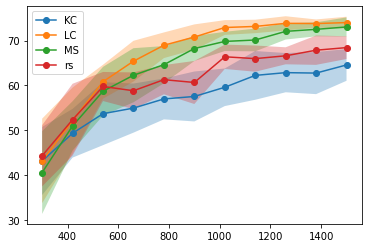

In [ ]:
plt.plot(samples, np.mean(acc_kc, axis = 0), "-o", label = "KC")
plt.fill_between(samples, np.mean(acc_kc, axis = 0)-np.std(acc_kc, axis = 0), np.mean(acc_kc, axis = 0)+np.std(acc_kc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_lc, axis = 0), "-o", label = "LC")
plt.fill_between(samples, np.mean(acc_lc, axis = 0)-np.std(acc_lc, axis = 0), np.mean(acc_lc, axis = 0)+np.std(acc_lc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_ms, axis = 0), "-o", label = "MS")
plt.fill_between(samples, np.mean(acc_ms, axis = 0)-np.std(acc_ms, axis = 0), np.mean(acc_ms, axis = 0)+np.std(acc_ms, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_rs, axis = 0), "-o", label = "RS")
plt.fill_between(samples, np.mean(acc_rs, axis = 0)-np.std(acc_rs, axis = 0), np.mean(acc_rs, axis = 0)+np.std(acc_rs, axis = 0), alpha=0.3)

plt.legend()